In [1]:
# Import dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
import hvplot.pandas
import warnings
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
warnings.filterwarnings("ignore")

In [2]:
# The path to your CSV files
file_paths = ["resources/2015.csv", "resources/2016.csv", "resources/2017.csv", "resources/2018.csv", "resources/2019.csv"]

# Loop through the file paths for 2015-2020 and process each file separately
for file_path in file_paths:
    year = os.path.splitext(os.path.basename(file_path))[0]  # Extract the year from the file name
    df = pd.read_csv(file_path, thousands=',', decimal='.')

    # Determine the column name for the "Country" column
    country_column = None
    if 'Country' in df.columns:
        country_column = 'Country'
    elif 'Country or region' in df.columns:
        country_column = 'Country or region'

    if country_column:
        # Define a dictionary to map column names to the desired names
        df.rename(columns={
            "Country or region": "Country",
            "Country name": "Country",
            "Happiness.Score": "Happiness Score",
            "Ladder score": "Happiness Score",
            "Score": "Happiness Score",
            "Economy..GDP.per.Capita.": "GDP per Capita",
            "Economy (GDP per Capita)": "GDP per Capita",
            "Logged GDP per capita": "GDP per Capita",
            "GDP per capita": "GDP per Capita",
            "Family": "Social Support",
            "Social support": "Social Support",
            "Explained by: GDP per capita": "GDP per Capita",
            "Health..Life.Expectancy.": "Life Expectancy/Health",
            "Health (Life Expectancy)": "Life Expectancy/Health",
            "Healthy life expectancy": "Life Expectancy/Health",
            "Freedom to make life choices": "Freedom",
            "Trust..Government.Corruption.": "Trust (government corruption)",
            "Trust (Government Corruption)": "Trust (government corruption)",
            "Perceptions of corruption": "Trust (government corruption)",
            "Explained by: Generosity": "Generosity"
        }, inplace=True)

        # Select the desired columns in the specified order
        desired_columns = ["Country", "Happiness Score", "GDP per Capita", 
                           "Social Support", "Life Expectancy/Health", "Freedom", "Trust (government corruption)", 
                           "Generosity"]

        df = df[desired_columns]

        # Save the processed DataFrame to a separate CSV file for the current year
        output_file = f"resources/data_{year}_.csv"
        df.to_csv(output_file, index=False)
    

In [3]:
# 2020 needs columns dropped to rename and merge correctly
# Define the file path to CSV file
file_path = "2020.csv"

# Extract the year from the file name
year = os.path.splitext(os.path.basename(file_path))[0]

# Read CSV file
df = pd.read_csv(file_path, thousands=',', decimal='.')

# Drop unwanted columns
columns_to_drop = [
    "Standard error of ladder score",
    "upperwhisker",
    "lowerwhisker",
    "Logged GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption",
    "Ladder score in Dystopia",
    "Dystopia + residual",
    "Regional indicator"
]

df.drop(columns=columns_to_drop, inplace=True)

# Rename the remaining columns
df.rename(columns={
    "Country name": "Country",
    "Ladder score": "Happiness Score",
    "Explained by: Log GDP per capita": "GDP per Capita",
    "Explained by: Social support": "Social Support",
    "Explained by: Healthy life expectancy": "Life Expectancy/Health",
    "Explained by: Freedom to make life choices": "Freedom",
    "Explained by: Perceptions of corruption": "Trust (government corruption)",
    "Explained by: Generosity": "Generosity"
}, inplace=True)

# Select the desired columns in the specified order
desired_columns = ["Country", "Happiness Score", "GDP per Capita", 
                           "Social Support", "Life Expectancy/Health", "Freedom", "Trust (government corruption)", 
                           "Generosity"]

df = df[desired_columns]

# Save the processed DataFrame to a separate CSV file for the current year
output_file = f"resources/{year}_data.csv"
df.to_csv(output_file, index=False)

# Create a df for 2020
data2020 = pd.DataFrame(df)
data2020

Country  Happiness Score  GDP per Capita  \
0                     Finland           7.8087        1.285190   
1                     Denmark           7.6456        1.326949   
2                 Switzerland           7.5599        1.390774   
3                     Iceland           7.5045        1.326502   
4                      Norway           7.4880        1.424207   
..                        ...              ...             ...   
148  Central African Republic           3.4759        0.041072   
149                    Rwanda           3.3123        0.343243   
150                  Zimbabwe           3.2992        0.425564   
151               South Sudan           2.8166        0.289083   
152               Afghanistan           2.5669        0.300706   

     Social Support  Life Expectancy/Health   Freedom  \
0          1.499526                0.961271  0.662317   
1          1.503449                0.979333  0.665040   
2          1.472403                1.040533  0.628954   
3          1.547567                1.000843  0.661981   
4          1.495173                1.008072  0.670201   
..              ...                     ...       ...   
148        0.000000                0.000000  0.292814   
149        0.522876                0.572383  0.604088   
150        1.047835                0.375038  0.377405   
151        0.553279                0.208809  0.065609   
152        0.356434                0.266052  0.000000   

     Trust (government corruption)  Generosity  
0                         0.477857    0.159670  
1                         0.495260    0.242793  
2                         0.407946    0.269056  
3                         0.144541    0.362330  
4                         0.434101    0.287985  
..                             ...         ...  
148                       0.028265    0.253513  
149                       0.485542    0.235705  
150                       0.080929    0.151349  
151                       0.111157    0.209935  
152                       0.001226    0.135235  

[153 rows x 8 columns]

In [6]:
#Read our datas from csv files
data2015 = pd.read_csv('resources/data_2015_.csv') 
data2016 = pd.read_csv('resources/data_2016_.csv') 
data2017 = pd.read_csv('resources/data_2017_.csv') 
data2018 = pd.read_csv('resources/data_2018_.csv') 
data2019 = pd.read_csv('resources/data_2019_.csv')

# Top 10 and bottom 10 countries for Happiness Score

In [7]:
# Get the top 10 of the given year
data2015.head(10)

Country  Happiness Score  GDP per Capita  Social Support  \
0  Switzerland            7.587         1.39651         1.34951   
1      Iceland            7.561         1.30232         1.40223   
2      Denmark            7.527         1.32548         1.36058   
3       Norway            7.522         1.45900         1.33095   
4       Canada            7.427         1.32629         1.32261   
5      Finland            7.406         1.29025         1.31826   
6  Netherlands            7.378         1.32944         1.28017   
7       Sweden            7.364         1.33171         1.28907   
8  New Zealand            7.286         1.25018         1.31967   
9    Australia            7.284         1.33358         1.30923   

   Life Expectancy/Health  Freedom  Trust (government corruption)  Generosity  
0                 0.94143  0.66557                        0.41978     0.29678  
1                 0.94784  0.62877                        0.14145     0.43630  
2                 0.87464  0.64938                        0.48357     0.34139  
3                 0.88521  0.66973                        0.36503     0.34699  
4                 0.90563  0.63297                        0.32957     0.45811  
5                 0.88911  0.64169                        0.41372     0.23351  
6                 0.89284  0.61576                        0.31814     0.47610  
7                 0.91087  0.65980                        0.43844     0.36262  
8                 0.90837  0.63938                        0.42922     0.47501  
9                 0.93156  0.65124                        0.35637     0.43562

In [8]:
# Get the bottom 10 of the given year
data2015.tail(10)

Country  Happiness Score  GDP per Capita  Social Support  \
148          Chad            3.667         0.34193         0.76062   
149        Guinea            3.656         0.17417         0.46475   
150   Ivory Coast            3.655         0.46534         0.77115   
151  Burkina Faso            3.587         0.25812         0.85188   
152   Afghanistan            3.575         0.31982         0.30285   
153        Rwanda            3.465         0.22208         0.77370   
154         Benin            3.340         0.28665         0.35386   
155         Syria            3.006         0.66320         0.47489   
156       Burundi            2.905         0.01530         0.41587   
157          Togo            2.839         0.20868         0.13995   

     Life Expectancy/Health  Freedom  Trust (government corruption)  \
148                 0.15010  0.23501                        0.05269   
149                 0.24009  0.37725                        0.12139   
150                 0.15185  0.46866                        0.17922   
151                 0.27125  0.39493                        0.12832   
152                 0.30335  0.23414                        0.09719   
153                 0.42864  0.59201                        0.55191   
154                 0.31910  0.48450                        0.08010   
155                 0.72193  0.15684                        0.18906   
156                 0.22396  0.11850                        0.10062   
157                 0.28443  0.36453                        0.10731   

     Generosity  
148     0.18386  
149     0.28657  
150     0.20165  
151     0.21747  
152     0.36510  
153     0.22628  
154     0.18260  
155     0.47179  
156     0.19727  
157     0.16681

## Info (Check for Missing or Invalid Values):

In [99]:
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Happiness Score                158 non-null    float64
 2   GDP per Capita                 158 non-null    float64
 3   Social Support                 158 non-null    float64
 4   Life Expectancy/Health         158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (government corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.0+ KB


In [100]:
data2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Happiness Score                157 non-null    float64
 2   GDP per Capita                 157 non-null    float64
 3   Social Support                 157 non-null    float64
 4   Life Expectancy/Health         157 non-null    float64
 5   Freedom                        157 non-null    float64
 6   Trust (government corruption)  157 non-null    float64
 7   Generosity                     157 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


In [101]:
data2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness Score                155 non-null    float64
 2   GDP per Capita                 155 non-null    float64
 3   Social Support                 155 non-null    float64
 4   Life Expectancy/Health         155 non-null    float64
 5   Freedom                        155 non-null    float64
 6   Trust (government corruption)  155 non-null    float64
 7   Generosity                     155 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.8+ KB


In [102]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        156 non-null    object 
 1   Happiness Score                156 non-null    float64
 2   GDP per Capita                 156 non-null    float64
 3   Social Support                 156 non-null    float64
 4   Life Expectancy/Health         156 non-null    float64
 5   Freedom                        156 non-null    float64
 6   Trust (government corruption)  155 non-null    float64
 7   Generosity                     156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


In [103]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        156 non-null    object 
 1   Happiness Score                156 non-null    float64
 2   GDP per Capita                 156 non-null    float64
 3   Social Support                 156 non-null    float64
 4   Life Expectancy/Health         156 non-null    float64
 5   Freedom                        156 non-null    float64
 6   Trust (government corruption)  156 non-null    float64
 7   Generosity                     156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


In [104]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        153 non-null    object 
 1   Happiness Score                153 non-null    float64
 2   GDP per Capita                 153 non-null    float64
 3   Social Support                 153 non-null    float64
 4   Life Expectancy/Health         153 non-null    float64
 5   Freedom                        153 non-null    float64
 6   Trust (government corruption)  153 non-null    float64
 7   Generosity                     153 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.7+ KB


# Summary statistics

In [9]:
data2015.describe()

Happiness Score  GDP per Capita  Social Support  \
count       158.000000      158.000000      158.000000   
mean          5.375734        0.846137        0.991046   
std           1.145010        0.403121        0.272369   
min           2.839000        0.000000        0.000000   
25%           4.526000        0.545808        0.856823   
50%           5.232500        0.910245        1.029510   
75%           6.243750        1.158448        1.214405   
max           7.587000        1.690420        1.402230   

       Life Expectancy/Health     Freedom  Trust (government corruption)  \
count              158.000000  158.000000                     158.000000   
mean                 0.630259    0.428615                       0.143422   
std                  0.247078    0.150693                       0.120034   
min                  0.000000    0.000000                       0.000000   
25%                  0.439185    0.328330                       0.061675   
50%                  0.696705    0.435515                       0.107220   
75%                  0.811013    0.549092                       0.180255   
max                  1.025250    0.669730                       0.551910   

       Generosity  
count  158.000000  
mean     0.237296  
std      0.126685  
min      0.000000  
25%      0.150553  
50%      0.216130  
75%      0.309883  
max      0.795880

In [10]:
data2016.describe()

Happiness Score  GDP per Capita  Social Support  \
count       157.000000      157.000000      157.000000   
mean          5.382185        0.953880        0.793621   
std           1.141674        0.412595        0.266706   
min           2.905000        0.000000        0.000000   
25%           4.404000        0.670240        0.641840   
50%           5.314000        1.027800        0.841420   
75%           6.269000        1.279640        1.021520   
max           7.526000        1.824270        1.183260   

       Life Expectancy/Health     Freedom  Trust (government corruption)  \
count              157.000000  157.000000                     157.000000   
mean                 0.557619    0.370994                       0.137624   
std                  0.229349    0.145507                       0.111038   
min                  0.000000    0.000000                       0.000000   
25%                  0.382910    0.257480                       0.061260   
50%                  0.596590    0.397470                       0.105470   
75%                  0.729930    0.484530                       0.175540   
max                  0.952770    0.608480                       0.505210   

       Generosity  
count  157.000000  
mean     0.242635  
std      0.133756  
min      0.000000  
25%      0.154570  
50%      0.222450  
75%      0.311850  
max      0.819710

In [11]:
data2017.describe()

Happiness Score  GDP per Capita  Social Support  \
count       155.000000      155.000000      155.000000   
mean          5.354019        0.984718        1.188898   
std           1.131230        0.420793        0.287263   
min           2.693000        0.000000        0.000000   
25%           4.505500        0.663371        1.042635   
50%           5.279000        1.064578        1.253918   
75%           6.101500        1.318027        1.414316   
max           7.537000        1.870766        1.610574   

       Life Expectancy/Health     Freedom  Trust (government corruption)  \
count              155.000000  155.000000                     155.000000   
mean                 0.551341    0.408786                       0.123120   
std                  0.237073    0.149997                       0.101661   
min                  0.000000    0.000000                       0.000000   
25%                  0.369866    0.303677                       0.057271   
50%                  0.606042    0.437454                       0.089848   
75%                  0.723008    0.516561                       0.153296   
max                  0.949492    0.658249                       0.464308   

       Generosity  
count  155.000000  
mean     0.246883  
std      0.134780  
min      0.000000  
25%      0.154106  
50%      0.231538  
75%      0.323762  
max      0.838075

In [12]:
data2018.describe()

Happiness Score  GDP per Capita  Social Support  \
count       156.000000      156.000000      156.000000   
mean          5.375917        0.891449        1.213237   
std           1.119506        0.391921        0.302372   
min           2.905000        0.000000        0.000000   
25%           4.453750        0.616250        1.066750   
50%           5.378000        0.949500        1.255000   
75%           6.168500        1.197750        1.463000   
max           7.632000        2.096000        1.644000   

       Life Expectancy/Health     Freedom  Trust (government corruption)  \
count              156.000000  156.000000                     155.000000   
mean                 0.597346    0.454506                       0.112000   
std                  0.247579    0.162424                       0.096492   
min                  0.000000    0.000000                       0.000000   
25%                  0.422250    0.356000                       0.051000   
50%                  0.644000    0.487000                       0.082000   
75%                  0.777250    0.578500                       0.137000   
max                  1.030000    0.724000                       0.457000   

       Generosity  
count  156.000000  
mean     0.181006  
std      0.098471  
min      0.000000  
25%      0.109500  
50%      0.174000  
75%      0.239000  
max      0.598000

In [13]:
data2019.describe()

Happiness Score  GDP per Capita  Social Support  \
count       156.000000      156.000000      156.000000   
mean          5.407096        0.905147        1.208814   
std           1.113120        0.398389        0.299191   
min           2.853000        0.000000        0.000000   
25%           4.544500        0.602750        1.055750   
50%           5.379500        0.960000        1.271500   
75%           6.184500        1.232500        1.452500   
max           7.769000        1.684000        1.624000   

       Life Expectancy/Health     Freedom  Trust (government corruption)  \
count              156.000000  156.000000                     156.000000   
mean                 0.725244    0.392571                       0.110603   
std                  0.242124    0.143289                       0.094538   
min                  0.000000    0.000000                       0.000000   
25%                  0.547750    0.308000                       0.047000   
50%                  0.789000    0.417000                       0.085500   
75%                  0.881750    0.507250                       0.141250   
max                  1.141000    0.631000                       0.453000   

       Generosity  
count  156.000000  
mean     0.184846  
std      0.095254  
min      0.000000  
25%      0.108750  
50%      0.177500  
75%      0.248250  
max      0.566000

In [14]:
data2020.describe()

Happiness Score  GDP per Capita  Social Support  \
count        153.00000      153.000000      153.000000   
mean           5.47324        0.868771        1.155607   
std            1.11227        0.372416        0.286866   
min            2.56690        0.000000        0.000000   
25%            4.72410        0.575862        0.986718   
50%            5.51500        0.918549        1.203987   
75%            6.22850        1.169229        1.387139   
max            7.80870        1.536676        1.547567   

       Life Expectancy/Health     Freedom  Trust (government corruption)  \
count              153.000000  153.000000                     153.000000   
mean                 0.692869    0.463583                       0.130718   
std                  0.254094    0.141172                       0.113097   
min                  0.000000    0.000000                       0.000000   
25%                  0.495443    0.381457                       0.055805   
50%                  0.759818    0.483293                       0.098435   
75%                  0.867249    0.576665                       0.163064   
max                  1.137814    0.693270                       0.533162   

       Generosity  
count  153.000000  
mean     0.189375  
std      0.100401  
min      0.000000  
25%      0.115006  
50%      0.176745  
75%      0.255510  
max      0.569814

# Correlation Coefficient and Heatmap

In [15]:
# Get the correlation map
data2015.corr()

Happiness Score  GDP per Capita  \
Happiness Score                       1.000000        0.780966   
GDP per Capita                        0.780966        1.000000   
Social Support                        0.740605        0.645299   
Life Expectancy/Health                0.724200        0.816478   
Freedom                               0.568211        0.370300   
Trust (government corruption)         0.395199        0.307885   
Generosity                            0.180319       -0.010465   

                               Social Support  Life Expectancy/Health  \
Happiness Score                      0.740605                0.724200   
GDP per Capita                       0.645299                0.816478   
Social Support                       1.000000                0.531104   
Life Expectancy/Health               0.531104                1.000000   
Freedom                              0.441518                0.360477   
Trust (government corruption)        0.205605                0.248335   
Generosity                           0.087513                0.108335   

                                Freedom  Trust (government corruption)  \
Happiness Score                0.568211                       0.395199   
GDP per Capita                 0.370300                       0.307885   
Social Support                 0.441518                       0.205605   
Life Expectancy/Health         0.360477                       0.248335   
Freedom                        1.000000                       0.493524   
Trust (government corruption)  0.493524                       1.000000   
Generosity                     0.373916                       0.276123   

                               Generosity  
Happiness Score                  0.180319  
GDP per Capita                  -0.010465  
Social Support                   0.087513  
Life Expectancy/Health           0.108335  
Freedom                          0.373916  
Trust (government corruption)    0.276123  
Generosity                       1.000000

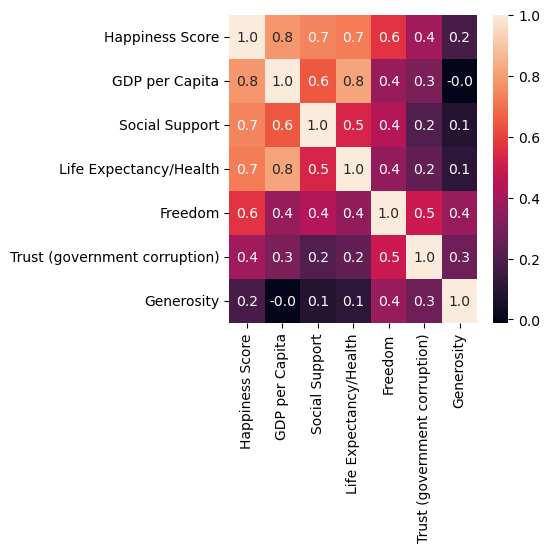

In [16]:
# Plot a correlation map
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(data2015.corr(), annot=True,fmt='.1f',ax=ax) 


plt.show() 

In [19]:
data2016.corr()

Happiness Score  GDP per Capita  \
Happiness Score                       1.000000        0.790322   
GDP per Capita                        0.790322        1.000000   
Social Support                        0.739252        0.669540   
Life Expectancy/Health                0.765384        0.837067   
Freedom                               0.566827        0.362283   
Trust (government corruption)         0.402032        0.294185   
Generosity                            0.156848       -0.025531   

                               Social Support  Life Expectancy/Health  \
Happiness Score                      0.739252                0.765384   
GDP per Capita                       0.669540                0.837067   
Social Support                       1.000000                0.588377   
Life Expectancy/Health               0.588377                1.000000   
Freedom                              0.450208                0.341199   
Trust (government corruption)        0.213561                0.249583   
Generosity                           0.089629                0.075987   

                                Freedom  Trust (government corruption)  \
Happiness Score                0.566827                       0.402032   
GDP per Capita                 0.362283                       0.294185   
Social Support                 0.450208                       0.213561   
Life Expectancy/Health         0.341199                       0.249583   
Freedom                        1.000000                       0.502054   
Trust (government corruption)  0.502054                       1.000000   
Generosity                     0.361751                       0.305930   

                               Generosity  
Happiness Score                  0.156848  
GDP per Capita                  -0.025531  
Social Support                   0.089629  
Life Expectancy/Health           0.075987  
Freedom                          0.361751  
Trust (government corruption)    0.305930  
Generosity                       1.000000

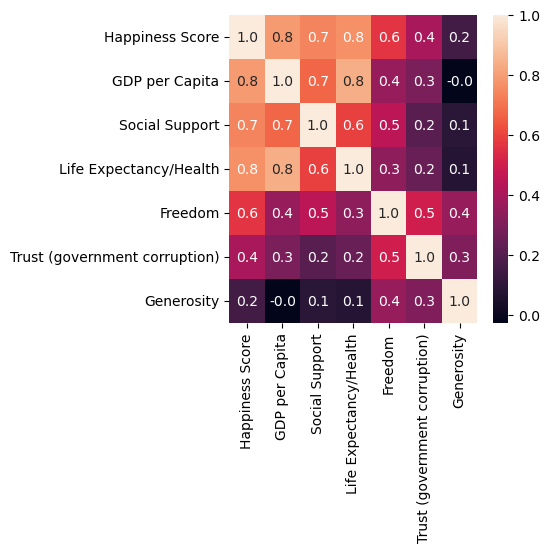

In [20]:
# Plot a correlation map
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(data2016.corr(), annot=True,fmt='.1f',ax=ax) 


plt.show() 

In [21]:
data2017.corr()

Happiness Score  GDP per Capita  \
Happiness Score                       1.000000        0.812469   
GDP per Capita                        0.812469        1.000000   
Social Support                        0.752737        0.688296   
Life Expectancy/Health                0.781951        0.843077   
Freedom                               0.570137        0.369873   
Trust (government corruption)         0.429080        0.350944   
Generosity                            0.155256       -0.019011   

                               Social Support  Life Expectancy/Health  \
Happiness Score                      0.752737                0.781951   
GDP per Capita                       0.688296                0.843077   
Social Support                       1.000000                0.612080   
Life Expectancy/Health               0.612080                1.000000   
Freedom                              0.424966                0.349827   
Trust (government corruption)        0.231841                0.279752   
Generosity                           0.051693                0.063191   

                                Freedom  Trust (government corruption)  \
Happiness Score                0.570137                       0.429080   
GDP per Capita                 0.369873                       0.350944   
Social Support                 0.424966                       0.231841   
Life Expectancy/Health         0.349827                       0.279752   
Freedom                        1.000000                       0.499183   
Trust (government corruption)  0.499183                       1.000000   
Generosity                     0.316083                       0.294159   

                               Generosity  
Happiness Score                  0.155256  
GDP per Capita                  -0.019011  
Social Support                   0.051693  
Life Expectancy/Health           0.063191  
Freedom                          0.316083  
Trust (government corruption)    0.294159  
Generosity                       1.000000

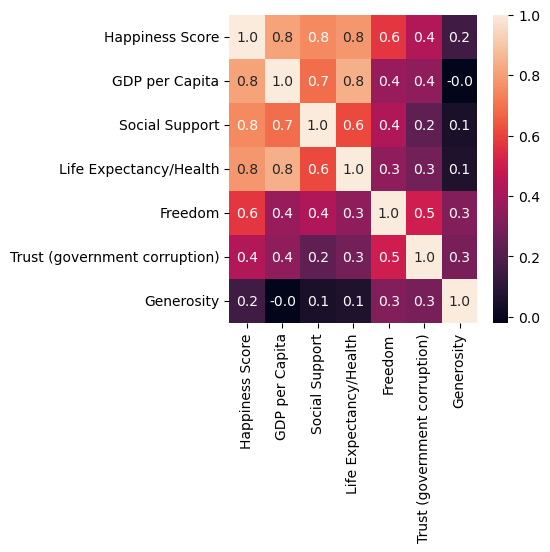

In [22]:
# Plot a correlation map
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(data2017.corr(), annot=True,fmt='.1f',ax=ax) 


plt.show() 

In [23]:
data2018.corr()

Happiness Score  GDP per Capita  \
Happiness Score                       1.000000        0.802124   
GDP per Capita                        0.802124        1.000000   
Social Support                        0.745760        0.672080   
Life Expectancy/Health                0.775814        0.844273   
Freedom                               0.544280        0.332275   
Trust (government corruption)         0.405292        0.319582   
Generosity                            0.135825       -0.011241   

                               Social Support  Life Expectancy/Health  \
Happiness Score                      0.745760                0.775814   
GDP per Capita                       0.672080                0.844273   
Social Support                       1.000000                0.667288   
Life Expectancy/Health               0.667288                1.000000   
Freedom                              0.411087                0.355475   
Trust (government corruption)        0.218364                0.315569   
Generosity                           0.018226                0.020751   

                                Freedom  Trust (government corruption)  \
Happiness Score                0.544280                       0.405292   
GDP per Capita                 0.332275                       0.319582   
Social Support                 0.411087                       0.218364   
Life Expectancy/Health         0.355475                       0.315569   
Freedom                        1.000000                       0.462446   
Trust (government corruption)  0.462446                       1.000000   
Generosity                     0.297988                       0.362249   

                               Generosity  
Happiness Score                  0.135825  
GDP per Capita                  -0.011241  
Social Support                   0.018226  
Life Expectancy/Health           0.020751  
Freedom                          0.297988  
Trust (government corruption)    0.362249  
Generosity                       1.000000

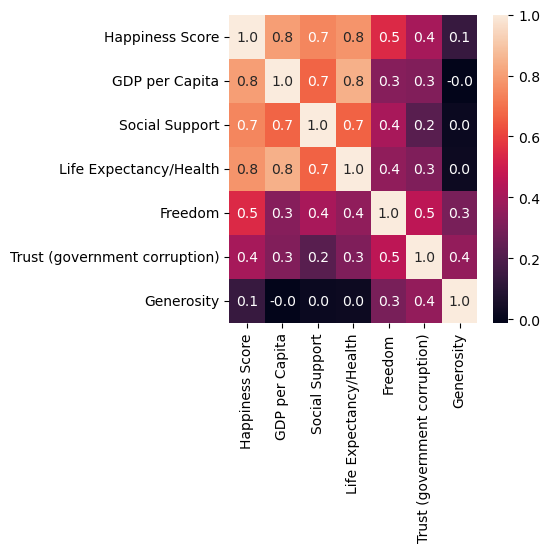

In [24]:
# Plot a correlation map
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(data2018.corr(), annot=True,fmt='.1f',ax=ax) 


plt.show() 

In [25]:
data2019.corr()

Happiness Score  GDP per Capita  \
Happiness Score                       1.000000        0.793883   
GDP per Capita                        0.793883        1.000000   
Social Support                        0.777058        0.754906   
Life Expectancy/Health                0.779883        0.835462   
Freedom                               0.566742        0.379079   
Trust (government corruption)         0.385613        0.298920   
Generosity                            0.075824       -0.079662   

                               Social Support  Life Expectancy/Health  \
Happiness Score                      0.777058                0.779883   
GDP per Capita                       0.754906                0.835462   
Social Support                       1.000000                0.719009   
Life Expectancy/Health               0.719009                1.000000   
Freedom                              0.447333                0.390395   
Trust (government corruption)        0.181899                0.295283   
Generosity                          -0.048126               -0.029511   

                                Freedom  Trust (government corruption)  \
Happiness Score                0.566742                       0.385613   
GDP per Capita                 0.379079                       0.298920   
Social Support                 0.447333                       0.181899   
Life Expectancy/Health         0.390395                       0.295283   
Freedom                        1.000000                       0.438843   
Trust (government corruption)  0.438843                       1.000000   
Generosity                     0.269742                       0.326538   

                               Generosity  
Happiness Score                  0.075824  
GDP per Capita                  -0.079662  
Social Support                  -0.048126  
Life Expectancy/Health          -0.029511  
Freedom                          0.269742  
Trust (government corruption)    0.326538  
Generosity                       1.000000

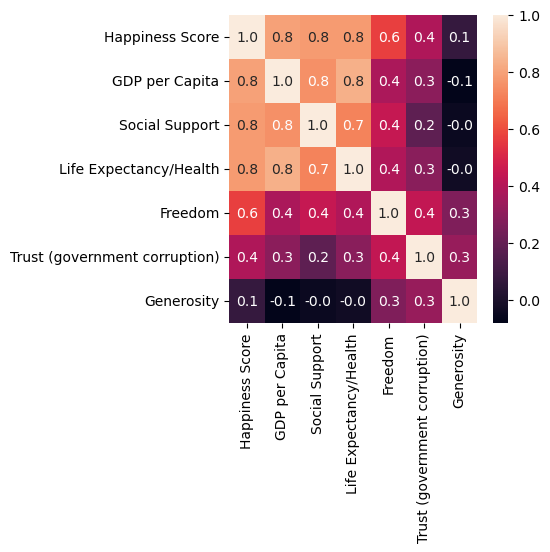

In [26]:
# Plot a correlation map
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(data2019.corr(), annot=True,fmt='.1f',ax=ax) 


plt.show() 

In [27]:
data2020.corr()

Happiness Score  GDP per Capita  \
Happiness Score                       1.000000        0.775374   
GDP per Capita                        0.775374        1.000000   
Social Support                        0.765001        0.781814   
Life Expectancy/Health                0.770316        0.848469   
Freedom                               0.590597        0.419019   
Trust (government corruption)         0.418305        0.334729   
Generosity                            0.069043       -0.118399   

                               Social Support  Life Expectancy/Health  \
Happiness Score                      0.765001                0.770316   
GDP per Capita                       0.781814                0.848469   
Social Support                       1.000000                0.742744   
Life Expectancy/Health               0.742744                1.000000   
Freedom                              0.478863                0.448846   
Trust (government corruption)        0.210530                0.353841   
Generosity                          -0.056780               -0.071852   

                                Freedom  Trust (government corruption)  \
Happiness Score                0.590597                       0.418305   
GDP per Capita                 0.419019                       0.334729   
Social Support                 0.478863                       0.210530   
Life Expectancy/Health         0.448846                       0.353841   
Freedom                        1.000000                       0.420145   
Trust (government corruption)  0.420145                       1.000000   
Generosity                     0.253721                       0.278480   

                               Generosity  
Happiness Score                  0.069043  
GDP per Capita                  -0.118399  
Social Support                  -0.056780  
Life Expectancy/Health          -0.071852  
Freedom                          0.253721  
Trust (government corruption)    0.278480  
Generosity                       1.000000

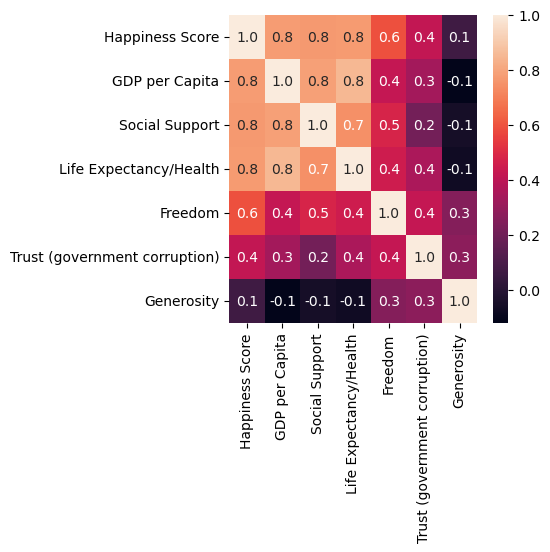

In [28]:
# Plot a correlation map
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(data2020.corr(), annot=True,fmt='.1f',ax=ax) 


plt.show() 

# Visualisations of summary statistics

In [29]:
# Create DataFrames for each year
dataframes = {
    '2015': data2015,
    '2016': data2016,
    '2017': data2017,
    '2018': data2018,
    '2019': data2019,
    '2020': data2020
}

# Concatenate DataFrames into a single DataFrame and add the 'Year' column
df = pd.concat([df.assign(Year=year) for year, df in dataframes.items()], ignore_index=True)

# Calculate the mean values for each variable over the years
mean_data = df.groupby(['Year']).mean()

# Reset the index for plotting
mean_data = mean_data.reset_index()

# Melt the DataFrame for easier plotting
mean_data_melted = pd.melt(mean_data, id_vars=['Year'], var_name='Variable', value_name='Mean Value')

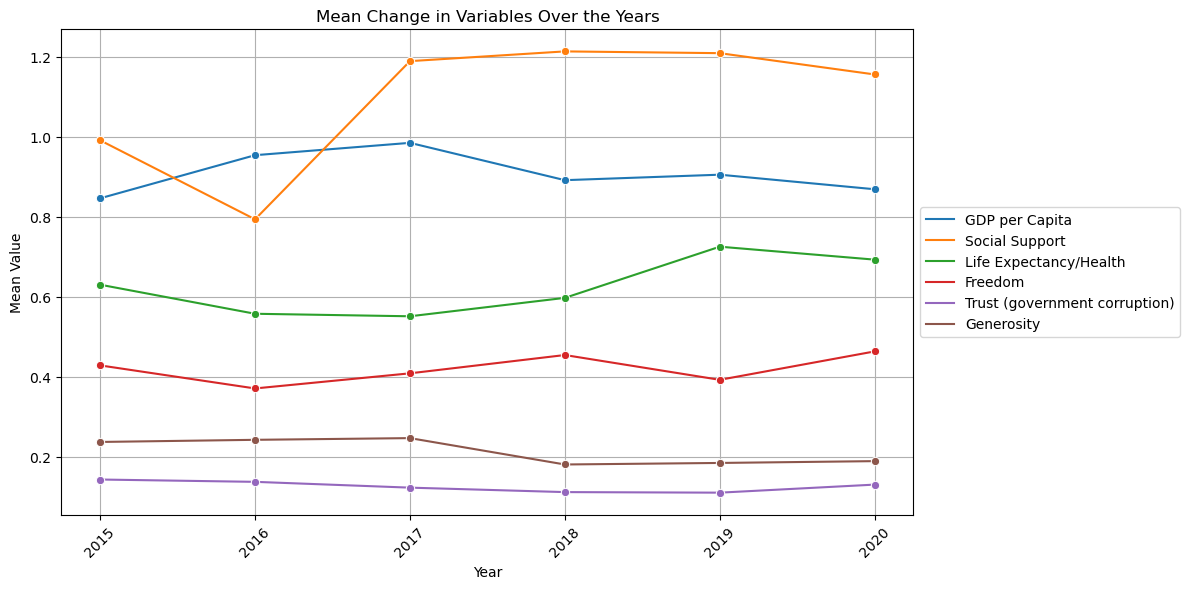

In [30]:
# Create a combined line plot for the other variables with labels
plt.figure(figsize=(12, 6))
other_variable_data = mean_data_melted[mean_data_melted['Variable'] != 'Happiness Score']
sns.lineplot(data=other_variable_data, x='Year', y='Mean Value', hue='Variable', marker='o')
plt.title('Mean Change in Happiness Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Mean Change in Variables Over the Years')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

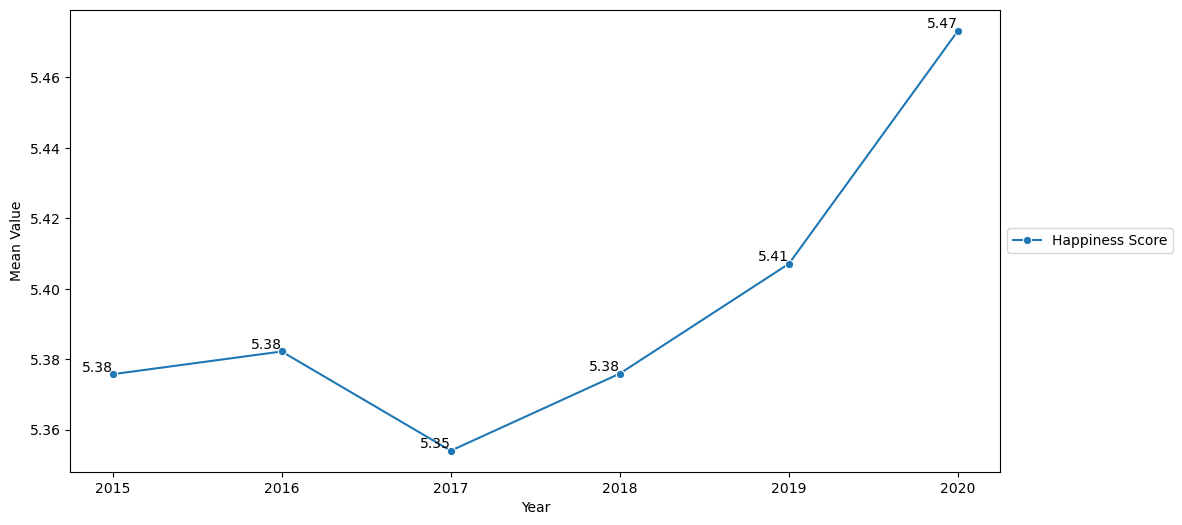

In [31]:
# Create a line plot for Happiness Score with labels
plt.figure(figsize=(12, 6))
happiness_score_data = mean_data_melted[mean_data_melted['Variable'] == 'Happiness Score']
sns.lineplot(data=happiness_score_data, x='Year', y='Mean Value', marker='o', label='Happiness Score')

# Add labels to each point
for x, y in zip(happiness_score_data['Year'], happiness_score_data['Mean Value']):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

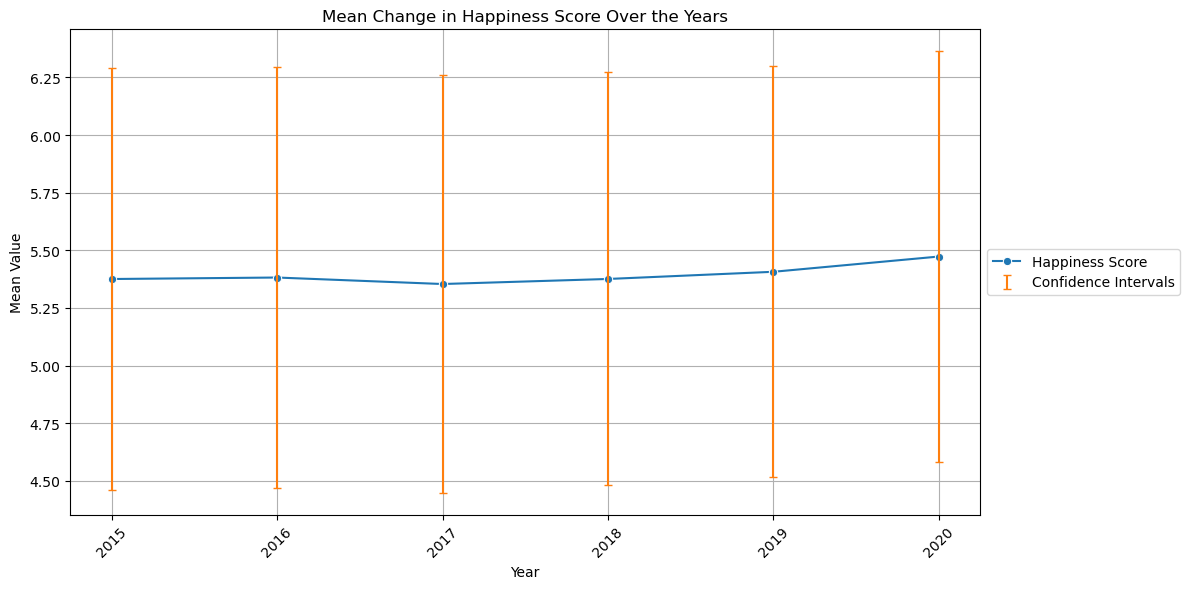

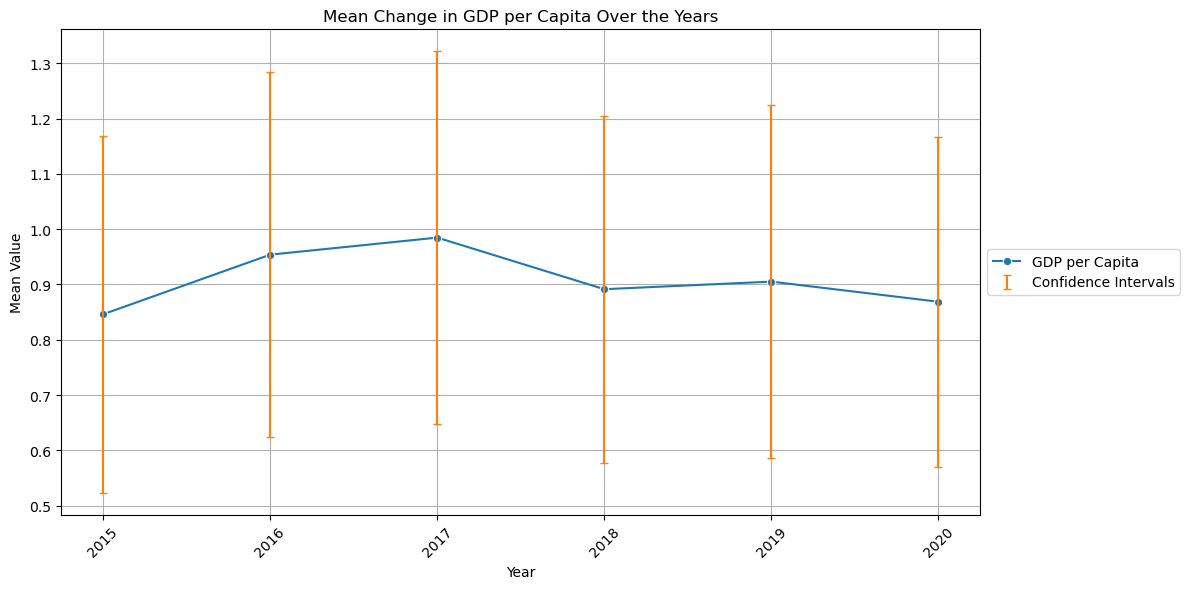

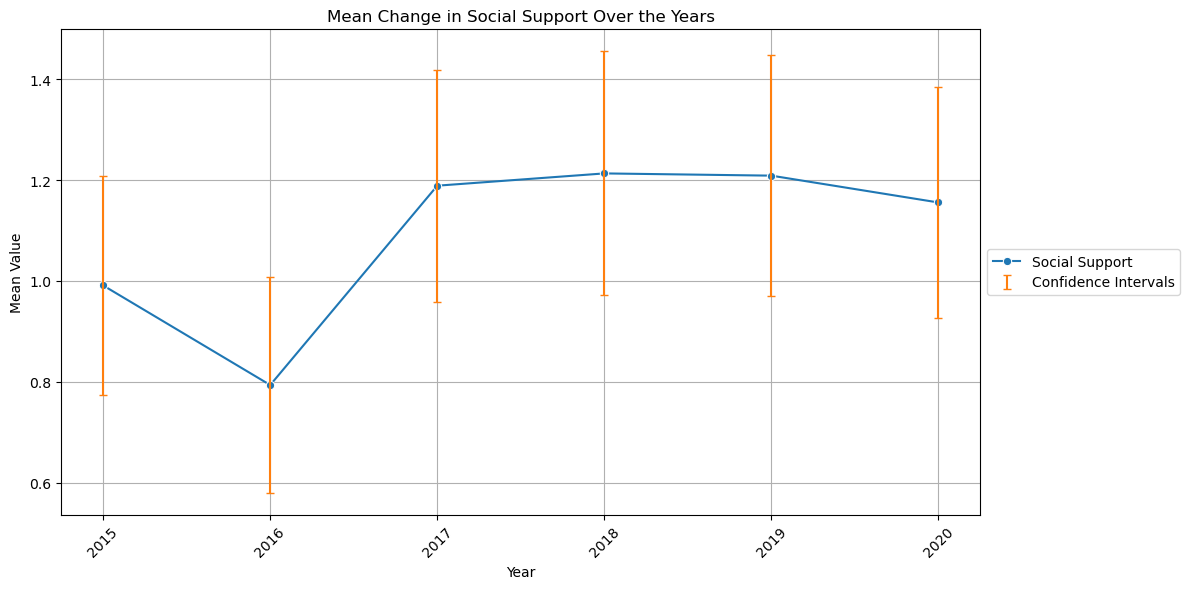

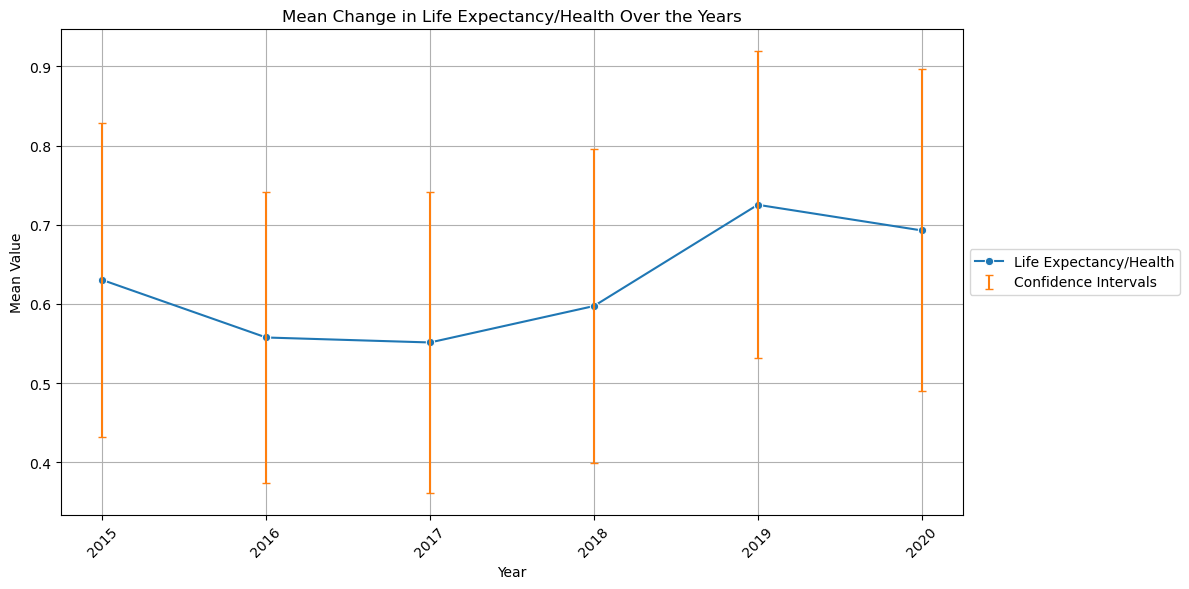

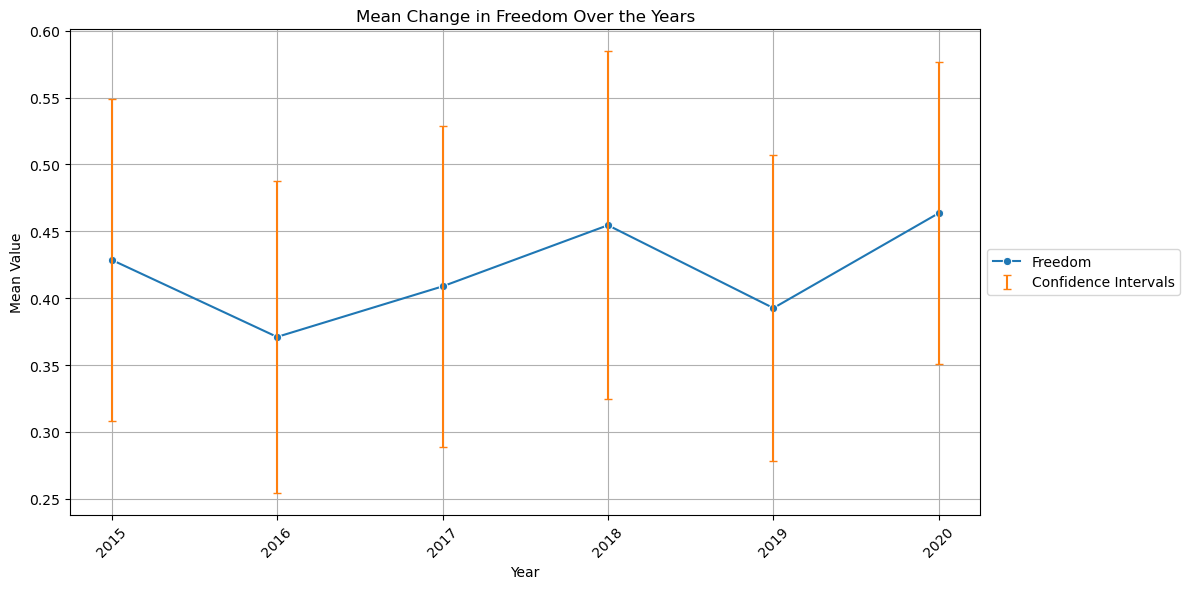

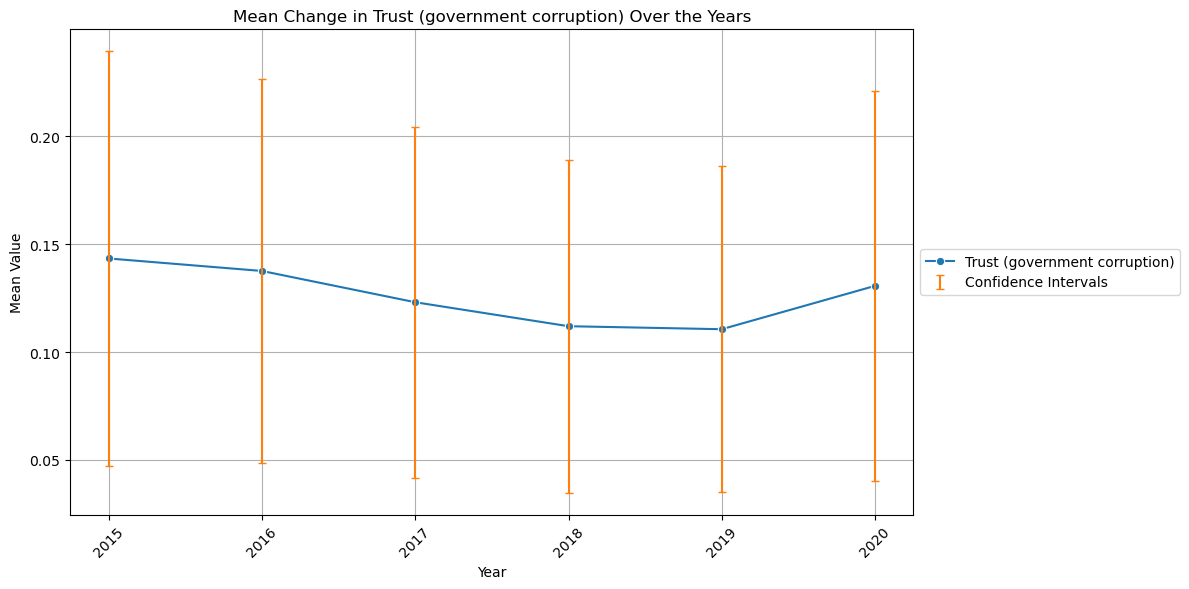

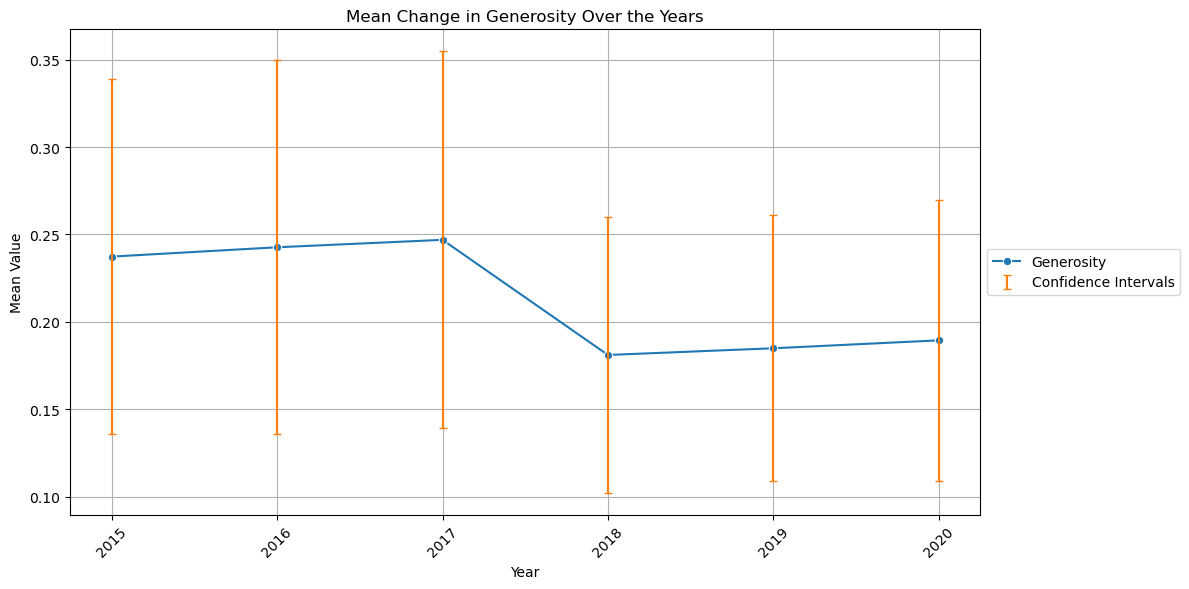

In [32]:
# Looking at the confidence intervals
# Calculate the mean values and standard deviations for each variable over the years
std_data = df.groupby(['Year']).std()

# Reset the index for plotting
std_data = std_data.reset_index()

# Melt the DataFrames for easier plotting
std_data_melted = pd.melt(std_data, id_vars=['Year'], var_name='Variable', value_name='Standard Deviation')

# Create line plots for each variable with confidence intervals on separate graphs
variables = mean_data_melted['Variable'].unique()

for variable in variables:
    plt.figure(figsize=(12, 6))
    variable_data = mean_data_melted[mean_data_melted['Variable'] == variable]
    
    # Calculate confidence intervals for each data point
    confidence_intervals = 1.96 * (std_data_melted[std_data_melted['Variable'] == variable]['Standard Deviation'] / np.sqrt(len(dataframes)))
    
    # Plot the line
    sns.lineplot(data=variable_data, x='Year', y='Mean Value', marker='o', label=variable)
    
    # Plot confidence intervals as error bars
    plt.errorbar(
        x=variable_data['Year'], 
        y=variable_data['Mean Value'], 
        yerr=confidence_intervals,
        linestyle='None',
        capsize=3,
        label='Confidence Intervals'
    )

    plt.xlabel('Year')
    plt.ylabel('Mean Value')
    plt.title(f'Mean Change in {variable} Over the Years')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
     # Define the filename based on the variable name (replace "/" with "_")
    #filename = f'mean_change_{variable.replace("/", "_")}.png'
    
    # Save the figure as a separate image with the correct filename
    #plt.savefig(filename)
    
plt.show()

## Glob Map Visualization:

In [105]:
# Globe maps of happiness score
# 2015 Globe Map
data = dict(type = 'choropleth', 
           locations = data2015['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = data2015['Happiness Score'], 
           text = data2015['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [34]:
# 2016 Globe Map
data = dict(type = 'choropleth', 
           locations = data2016['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = data2016['Happiness Score'], 
           text = data2016['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [35]:
# 2017 Globe Map
data = dict(type = 'choropleth', 
           locations = data2017['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = data2017['Happiness Score'], 
           text = data2017['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [36]:
# 2018 Globe Map
data = dict(type = 'choropleth', 
           locations = data2018['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = data2018['Happiness Score'], 
           text = data2018['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [37]:
# 2019 Globe Map
data = dict(type = 'choropleth', 
           locations = data2019['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = data2019['Happiness Score'], 
           text = data2019['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [38]:
# 2020 Globe Map
data = dict(type = 'choropleth', 
           locations = data2019['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = data2019['Happiness Score'], 
           text = data2019['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# How happiness and different attributes are affected by GDP per Capita?
1. Dataframe showing top 10 and bottom 10 countries based on GDP per Capita
2. Scatter plot with linear regression showing GDP per Capita vs. Happiness/other attributes
3. Box plot visualisations based on GDP per Capita

## Top 10 countries

In [39]:
top_10_countries_2015 = data2015.sort_values(by='GDP per Capita', ascending=False).head(10)
top_10_countries_2015

Country  Happiness Score  GDP per Capita  Social Support  \
27                 Qatar            6.611         1.69042         1.07860   
16            Luxembourg            6.946         1.56391         1.21963   
38                Kuwait            6.295         1.55422         1.16594   
23             Singapore            6.798         1.52186         1.02000   
3                 Norway            7.522         1.45900         1.33095   
19  United Arab Emirates            6.901         1.42727         1.12575   
0            Switzerland            7.587         1.39651         1.34951   
34          Saudi Arabia            6.411         1.39541         1.08393   
14         United States            7.119         1.39451         1.24711   
71             Hong Kong            5.474         1.38604         1.05818   

    Life Expectancy/Health  Freedom  Trust (government corruption)  Generosity  
27                 0.79733  0.64040                        0.52208     0.32573  
16                 0.91894  0.61583                        0.37798     0.28034  
38                 0.72492  0.55499                        0.25609     0.16228  
23                 1.02525  0.54252                        0.49210     0.31105  
3                  0.88521  0.66973                        0.36503     0.34699  
19                 0.80925  0.64157                        0.38583     0.26428  
0                  0.94143  0.66557                        0.41978     0.29678  
34                 0.72025  0.31048                        0.32524     0.13706  
14                 0.86179  0.54604                        0.15890     0.40105  
71                 1.01328  0.59608                        0.37124     0.39478

In [40]:
top_10_countries_2016 = data2016.sort_values(by='GDP per Capita', ascending=False).head(10)
top_10_countries_2016

Country  Happiness Score  GDP per Capita  Social Support  \
35                 Qatar            6.375         1.82427         0.87964   
19            Luxembourg            6.871         1.69752         1.03999   
21             Singapore            6.739         1.64555         0.86758   
40                Kuwait            6.239         1.61714         0.87758   
3                 Norway            7.498         1.57744         1.12690   
27  United Arab Emirates            6.573         1.57352         0.87114   
1            Switzerland            7.509         1.52733         1.14524   
74             Hong Kong            5.458         1.51070         0.87021   
12         United States            7.104         1.50796         1.04782   
33          Saudi Arabia            6.379         1.48953         0.84829   

    Life Expectancy/Health  Freedom  Trust (government corruption)  Generosity  
35                 0.71723  0.56679                        0.48049     0.32388  
19                 0.84542  0.54870                        0.35329     0.27571  
21                 0.94719  0.48770                        0.46987     0.32706  
40                 0.63569  0.43166                        0.23669     0.15965  
3                  0.79579  0.59609                        0.35776     0.37895  
27                 0.72993  0.56215                        0.35561     0.26591  
1                  0.86303  0.58557                        0.41203     0.28083  
74                 0.95277  0.48079                        0.31647     0.40097  
12                 0.77900  0.48163                        0.14868     0.41077  
33                 0.59267  0.37904                        0.30008     0.15457

In [41]:
top_10_countries_2017 = data2017.sort_values(by='GDP per Capita', ascending=False).head(10)
top_10_countries_2017

Country  Happiness Score  GDP per Capita  Social Support  \
34                    Qatar            6.375        1.870766        1.274297   
17               Luxembourg            6.863        1.741944        1.457584   
25                Singapore            6.572        1.692278        1.353814   
38                   Kuwait            6.105        1.632952        1.259699   
20     United Arab Emirates            6.648        1.626343        1.266410   
0                    Norway            7.537        1.616463        1.533524   
3               Switzerland            7.494        1.564980        1.516912   
70  Hong Kong S.A.R., China            5.472        1.551675        1.262791   
13            United States            6.993        1.546259        1.419921   
14                  Ireland            6.977        1.535707        1.558231   

    Life Expectancy/Health   Freedom  Trust (government corruption)  \
34                0.710098  0.604131                       0.439299   
17                0.845089  0.596628                       0.318834   
25                0.949492  0.549841                       0.464308   
38                0.632106  0.496338                       0.215160   
20                0.726798  0.608345                       0.324490   
0                 0.796667  0.635423                       0.315964   
3                 0.858131  0.620071                       0.367007   
70                0.943062  0.490969                       0.293934   
13                0.774287  0.505741                       0.135639   
14                0.809783  0.573110                       0.298388   

    Generosity  
34    0.330474  
17    0.283181  
25    0.345966  
38    0.228290  
20    0.360942  
0     0.362012  
3     0.290549  
70    0.374466  
13    0.392579  
14    0.427858

In [42]:
top_10_countries_2018 = data2018.sort_values(by='GDP per Capita', ascending=False).head(10)
top_10_countries_2018

Country  Happiness Score  GDP per Capita  Social Support  \
19  United Arab Emirates            6.774           2.096           0.776   
31                 Qatar            6.374           1.649           1.303   
16            Luxembourg            6.910           1.576           1.520   
33             Singapore            6.343           1.529           1.451   
44                Kuwait            6.083           1.474           1.301   
1                 Norway            7.594           1.456           1.582   
13               Ireland            6.977           1.448           1.583   
4            Switzerland            7.487           1.420           1.549   
75             Hong Kong            5.430           1.405           1.290   
17         United States            6.886           1.398           1.471   

    Life Expectancy/Health  Freedom  Trust (government corruption)  Generosity  
19                   0.670    0.284                            NaN       0.186  
31                   0.748    0.654                          0.171       0.256  
16                   0.896    0.632                          0.321       0.196  
33                   1.008    0.631                          0.457       0.261  
44                   0.675    0.554                          0.106       0.167  
1                    0.861    0.686                          0.340       0.286  
13                   0.876    0.614                          0.306       0.307  
4                    0.927    0.660                          0.357       0.256  
75                   1.030    0.524                          0.291       0.246  
17                   0.819    0.547                          0.133       0.291

In [43]:
top_10_countries_2019 = data2019.sort_values(by='GDP per Capita', ascending=False).head(10)
top_10_countries_2019

Country  Happiness Score  GDP per Capita  Social Support  \
28                 Qatar            6.374           1.684           1.313   
13            Luxembourg            7.090           1.609           1.479   
33             Singapore            6.262           1.572           1.463   
20  United Arab Emirates            6.825           1.503           1.310   
50                Kuwait            6.021           1.500           1.319   
15               Ireland            7.021           1.499           1.553   
2                 Norway            7.554           1.488           1.582   
5            Switzerland            7.480           1.452           1.526   
75             Hong Kong            5.430           1.438           1.277   
18         United States            6.892           1.433           1.457   

    Life Expectancy/Health  Freedom  Trust (government corruption)  Generosity  
28                   0.871    0.555                          0.167       0.220  
13                   1.012    0.526                          0.316       0.194  
33                   1.141    0.556                          0.453       0.271  
20                   0.825    0.598                          0.182       0.262  
50                   0.808    0.493                          0.097       0.142  
15                   0.999    0.516                          0.310       0.298  
2                    1.028    0.603                          0.341       0.271  
5                    1.052    0.572                          0.343       0.263  
75                   1.122    0.440                          0.287       0.258  
18                   0.874    0.454                          0.128       0.280

In [44]:
top_10_countries_2020 = data2020.sort_values(by='GDP per Capita', ascending=False).head(10)
top_10_countries_2020

Country  Happiness Score  GDP per Capita  \
9                  Luxembourg           7.2375        1.536676   
30                  Singapore           6.3771        1.519580   
15                    Ireland           7.0937        1.446887   
20       United Arab Emirates           6.7908        1.431086   
47                     Kuwait           6.1021        1.424834   
4                      Norway           7.4880        1.424207   
2                 Switzerland           7.5599        1.390774   
77  Hong Kong S.A.R. of China           5.5104        1.376746   
17              United States           6.9396        1.373987   
5                 Netherlands           7.4489        1.338946   

    Social Support  Life Expectancy/Health   Freedom  \
9         1.387528                0.986443  0.610137   
30        1.395457                1.137814  0.635317   
15        1.470596                0.975671  0.587780   
20        1.251171                0.787814  0.652936   
47        1.244780                0.776469  0.570261   
4         1.495173                1.008072  0.670201   
2         1.472403                1.040533  0.628954   
77        1.243584                1.136631  0.459357   
17        1.404787                0.831618  0.534608   
5         1.463646                0.975675  0.613626   

    Trust (government corruption)  Generosity  
9                        0.367041    0.195954  
30                       0.533162    0.218771  
15                       0.373433    0.295427  
20                       0.220214    0.280656  
47                       0.112815    0.132751  
4                        0.434101    0.287985  
2                        0.407946    0.269056  
77                       0.332485    0.288281  
17                       0.152285    0.298143  
5                        0.368570    0.336318

## Bottom 10 countries

In [47]:
bottom_10_countries_2015 = data2015.sort_values(by='GDP per Capita').head(10)
bottom_10_countries_2015

Country  Happiness Score  GDP per Capita  \
119          Congo (Kinshasa)            4.517         0.00000   
156                   Burundi            2.905         0.01530   
130                    Malawi            4.292         0.01604   
143                     Niger            3.845         0.06940   
115                   Liberia            4.571         0.07120   
147  Central African Republic            3.678         0.07850   
93                 Mozambique            4.971         0.08308   
149                    Guinea            3.656         0.17417   
90          Somaliland region            5.057         0.18847   
121                  Ethiopia            4.512         0.19073   

     Social Support  Life Expectancy/Health  Freedom  \
119         1.00120                 0.09806  0.22605   
156         0.41587                 0.22396  0.11850   
130         0.41134                 0.22562  0.43054   
143         0.77265                 0.29707  0.47692   
115         0.78968                 0.34201  0.28531   
147         0.00000                 0.06699  0.48879   
93          1.02626                 0.09131  0.34037   
149         0.46475                 0.24009  0.37725   
90          0.95152                 0.43873  0.46582   
121         0.60406                 0.44055  0.43450   

     Trust (government corruption)  Generosity  
119                        0.07625     0.24834  
156                        0.10062     0.19727  
130                        0.06977     0.33128  
143                        0.15639     0.19387  
115                        0.06232     0.24362  
147                        0.08289     0.23835  
93                         0.15603     0.22269  
149                        0.12139     0.28657  
90                         0.39928     0.50318  
121                        0.15048     0.24325

In [35]:
bottom_10_countries_2016 = data2016.sort_values(by='GDP per Capita').head(10)
bottom_10_countries_2016

Country  Happiness Score  GDP per Capita  Social Support  \
75             Somalia            5.440         0.00000         0.33613   
124   Congo (Kinshasa)            4.272         0.05661         0.80676   
156            Burundi            2.905         0.06831         0.23442   
131             Malawi            4.156         0.08709         0.14700   
149            Liberia            3.622         0.10706         0.50353   
141              Niger            3.856         0.13270         0.60530   
150             Guinea            3.607         0.22415         0.31090   
96   Somaliland Region            5.057         0.25558         0.75862   
137            Comoros            3.956         0.27509         0.60323   
147         Madagascar            3.695         0.27954         0.46115   

     Life Expectancy/Health  Freedom  Trust (government corruption)  \
75                  0.11466  0.56778                        0.31180   
124                 0.18800  0.15602                        0.06075   
156                 0.15747  0.04320                        0.09419   
131                 0.29364  0.41430                        0.07564   
149                 0.23165  0.25748                        0.04852   
141                 0.26162  0.38041                        0.17176   
150                 0.18829  0.30953                        0.11920   
96                  0.33108  0.39130                        0.36794   
137                 0.29981  0.15412                        0.18437   
147                 0.37109  0.13684                        0.07506   

     Generosity  
75      0.27225  
124     0.25458  
156     0.20290  
131     0.30968  
149     0.24063  
141     0.20970  
150     0.29914  
96      0.51479  
137     0.18270  
147     0.22040

In [36]:
bottom_10_countries_2017 = data2017.sort_values(by='GDP per Capita').head(10)
bottom_10_countries_2017

Country  Happiness Score  GDP per Capita  \
154  Central African Republic            2.693        0.000000   
92                    Somalia            5.151        0.022643   
153                   Burundi            2.905        0.091623   
125          Congo (Kinshasa)            4.280        0.092102   
147                   Liberia            3.533        0.119042   
134                     Niger            4.028        0.161925   
135                    Malawi            3.970        0.233442   
112                Mozambique            4.550        0.234306   
148                    Guinea            3.507        0.244550   
149                      Togo            3.495        0.305445   

     Social Support  Life Expectancy/Health   Freedom  \
154        0.000000                0.018773  0.270842   
92         0.721151                0.113989  0.602127   
153        0.629794                0.151611  0.059901   
125        1.229023                0.191407  0.235961   
147        0.872118                0.229918  0.332881   
134        0.993025                0.268505  0.363659   
135        0.512569                0.315090  0.466915   
112        0.870701                0.106654  0.480791   
148        0.791245                0.194129  0.348588   
149        0.431883                0.247106  0.380426   

     Trust (government corruption)  Generosity  
154                       0.056565    0.280876  
92                        0.282410    0.291631  
153                       0.084148    0.204435  
125                       0.060241    0.246456  
147                       0.038948    0.266550  
134                       0.138573    0.228674  
135                       0.072712    0.287170  
112                       0.179436    0.322228  
148                       0.110938    0.264815  
149                       0.095665    0.196896

In [37]:
bottom_10_countries_2018 = data2018.sort_values(by='GDP per Capita').head(10)
bottom_10_countries_2018

Country  Happiness Score  GDP per Capita  \
97                    Somalia            4.982           0.000   
154  Central African Republic            3.083           0.024   
131          Congo (Kinshasa)            4.245           0.069   
148                   Liberia            3.495           0.076   
155                   Burundi            2.905           0.091   
133                     Niger            4.166           0.131   
146                    Malawi            3.587           0.186   
122                Mozambique            4.417           0.198   
112              Sierra Leone            4.571           0.256   
138                      Togo            3.999           0.259   

     Social Support  Life Expectancy/Health  Freedom  \
97            0.712                   0.115    0.674   
154           0.000                   0.010    0.305   
131           1.136                   0.204    0.312   
148           0.858                   0.267    0.419   
155           0.627                   0.145    0.065   
133           0.867                   0.221    0.390   
146           0.541                   0.306    0.531   
122           0.902                   0.173    0.531   
112           0.813                   0.000    0.355   
138           0.474                   0.253    0.434   

     Trust (government corruption)  Generosity  
97                           0.282       0.238  
154                          0.038       0.218  
131                          0.052       0.197  
148                          0.030       0.206  
155                          0.076       0.149  
133                          0.099       0.175  
146                          0.080       0.210  
122                          0.158       0.206  
112                          0.053       0.238  
138                          0.101       0.158

In [38]:
bottom_10_countries_2019 = data2019.sort_values(by='GDP per Capita').head(10)
bottom_10_countries_2019

Country  Happiness Score  GDP per Capita  Social Support  \
75             Somalia            5.440         0.00000         0.33613   
124   Congo (Kinshasa)            4.272         0.05661         0.80676   
156            Burundi            2.905         0.06831         0.23442   
131             Malawi            4.156         0.08709         0.14700   
149            Liberia            3.622         0.10706         0.50353   
141              Niger            3.856         0.13270         0.60530   
150             Guinea            3.607         0.22415         0.31090   
96   Somaliland Region            5.057         0.25558         0.75862   
137            Comoros            3.956         0.27509         0.60323   
147         Madagascar            3.695         0.27954         0.46115   

     Life Expectancy/Health  Freedom  Trust (government corruption)  \
75                  0.11466  0.56778                        0.31180   
124                 0.18800  0.15602                        0.06075   
156                 0.15747  0.04320                        0.09419   
131                 0.29364  0.41430                        0.07564   
149                 0.23165  0.25748                        0.04852   
141                 0.26162  0.38041                        0.17176   
150                 0.18829  0.30953                        0.11920   
96                  0.33108  0.39130                        0.36794   
137                 0.29981  0.15412                        0.18437   
147                 0.37109  0.13684                        0.07506   

     Generosity  
75      0.27225  
124     0.25458  
156     0.20290  
131     0.30968  
149     0.24063  
141     0.20970  
150     0.29914  
96      0.51479  
137     0.18270  
147     0.22040

In [39]:
bottom_10_countries_2020 = data2020.sort_values(by='GDP per Capita').head(10)
bottom_10_countries_2020

Country  Happiness Score  GDP per Capita  \
139                   Burundi           3.7753        0.000000   
148  Central African Republic           3.4759        0.041072   
130          Congo (Kinshasa)           4.3110        0.062487   
102                     Niger           4.9096        0.108330   
123                   Liberia           4.5579        0.174103   
144                    Malawi           3.5380        0.176535   
119                Mozambique           4.6236        0.178741   
138              Sierra Leone           3.9264        0.240560   
136                Madagascar           4.1656        0.244553   
112                    Gambia           4.7506        0.256991   

     Social Support  Life Expectancy/Health   Freedom  \
139        0.403575                0.295213  0.275399   
148        0.000000                0.000000  0.292814   
130        0.833055                0.277212  0.364623   
102        0.703800                0.298816  0.435312   
123        0.920734                0.392284  0.405943   
144        0.530368                0.446163  0.487390   
119        0.955203                0.324224  0.560775   
138        0.747985                0.203954  0.382028   
136        0.823694                0.500617  0.192968   
112        0.882679                0.353248  0.403420   

     Trust (government corruption)  Generosity  
139                       0.212187    0.187402  
148                       0.028265    0.253513  
130                       0.081467    0.254325  
102                       0.137555    0.208177  
123                       0.051140    0.226968  
144                       0.131634    0.213185  
119                       0.163064    0.220422  
138                       0.047941    0.257647  
136                       0.076249    0.191190  
112                       0.158094    0.425990

## Summary statistics 

In [48]:
top_10_summary_2015 = top_10_countries_2015['GDP per Capita'].describe()
top_10_summary_2015

count    10.000000
mean      1.478915
std       0.101133
min       1.386040
25%       1.395685
50%       1.443135
75%       1.546130
max       1.690420
Name: GDP per Capita, dtype: float64

In [47]:
top_10_summary_2016 = top_10_countries_2016['GDP per Capita'].describe()
top_10_summary_2016

count    10.000000
mean      1.597096
std       0.103940
min       1.489530
25%       1.514857
50%       1.575480
75%       1.638448
max       1.824270
Name: GDP per Capita, dtype: float64

In [48]:
top_10_summary_2017 = top_10_countries_2017['GDP per Capita'].describe()
top_10_summary_2017

count    10.000000
mean      1.637937
std       0.105525
min       1.535707
25%       1.555001
50%       1.621403
75%       1.677446
max       1.870766
Name: GDP per Capita, dtype: float64

In [49]:
top_10_summary_2018 = top_10_countries_2018['GDP per Capita'].describe()
top_10_summary_2018

count    10.000000
mean      1.545100
std       0.209454
min       1.398000
25%       1.427000
50%       1.465000
75%       1.564250
max       2.096000
Name: GDP per Capita, dtype: float64

In [50]:
top_10_summary_2019 = top_10_countries_2019['GDP per Capita'].describe()
top_10_summary_2019

count    10.000000
mean      1.597096
std       0.103940
min       1.489530
25%       1.514857
50%       1.575480
75%       1.638448
max       1.824270
Name: GDP per Capita, dtype: float64

In [51]:
top_10_summary_2020 = top_10_countries_2020['GDP per Capita'].describe()
top_10_summary_2020

count    10.000000
mean      1.426372
std       0.062736
min       1.338946
25%       1.380253
50%       1.424520
75%       1.442937
max       1.536676
Name: GDP per Capita, dtype: float64

### The top 10 countries have higher average GDP per capita and less variability, while the bottom 10 countries have a lower average GDP per capita with a wider income disparity.

## Scatter plots: GDP vs [Social Support, Healthy life Exp, Freedom to make life choices, Generosity, Corruption ] 

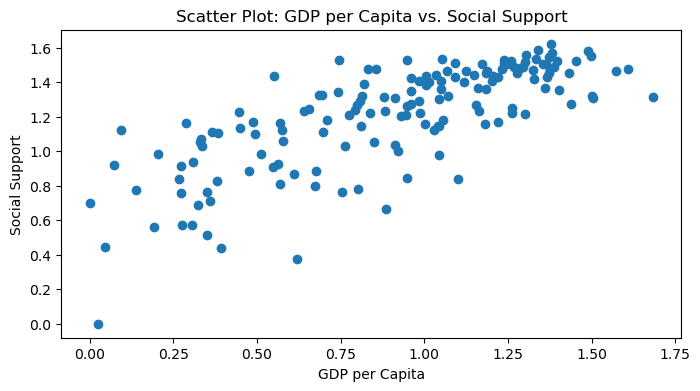

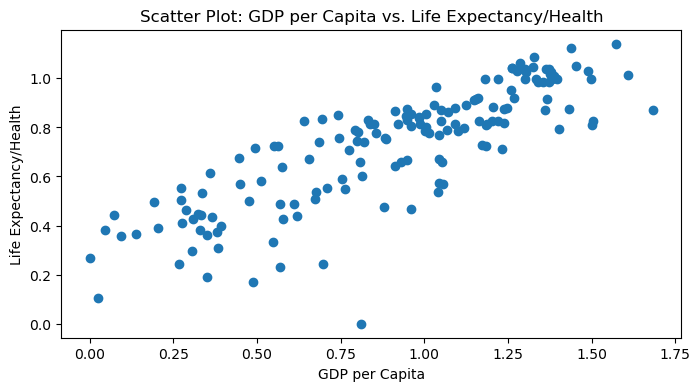

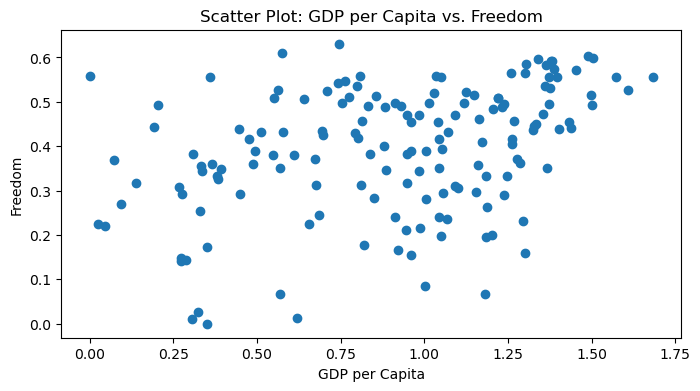

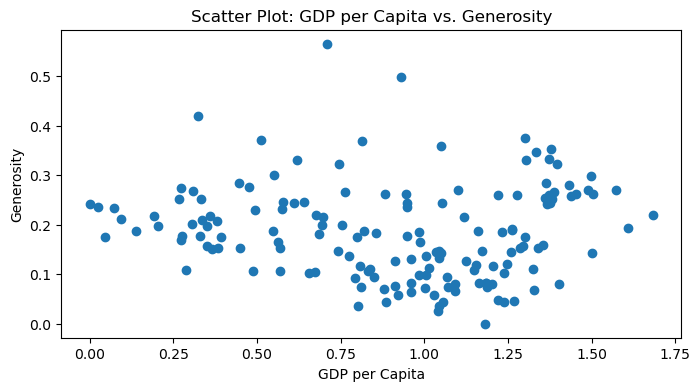

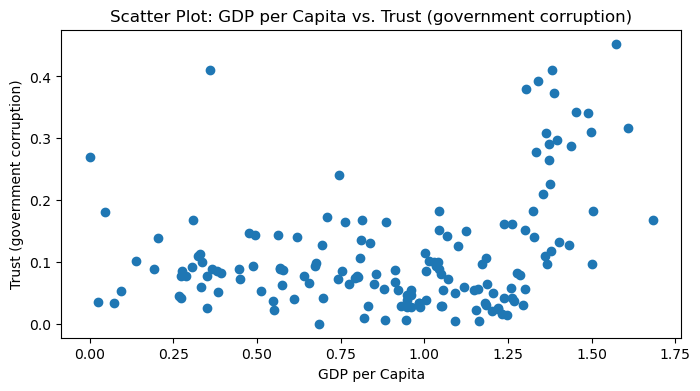

In [49]:

variables = ['Social Support', 'Life Expectancy/Health', 'Freedom', 'Generosity', 'Trust (government corruption)']

for variable in variables:
    plt.figure(figsize=(8, 4))
    plt.scatter(data2019['GDP per Capita'], data2019[variable])
    plt.xlabel('GDP per Capita')
    plt.ylabel(variable)
    plt.title(f'Scatter Plot: GDP per Capita vs. {variable}')
    plt.show()

## Scatter plots: Social Support vs [GDP, Healthy life Exp, Freedom to make life choices, Generosity, Corruption ] 

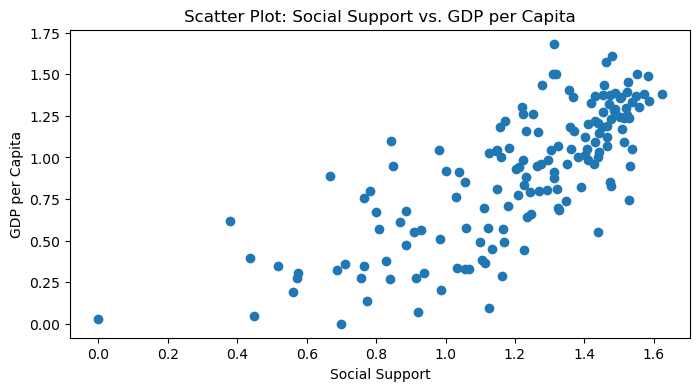

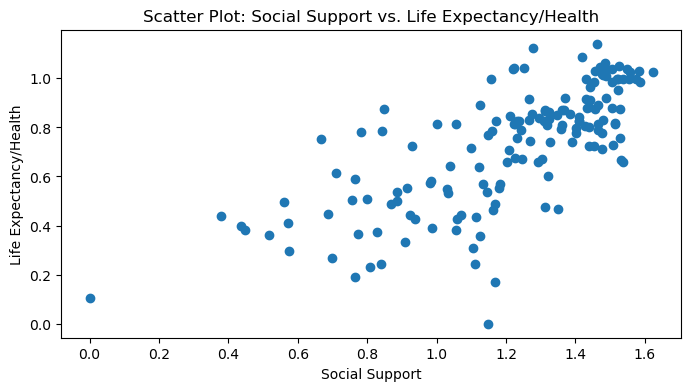

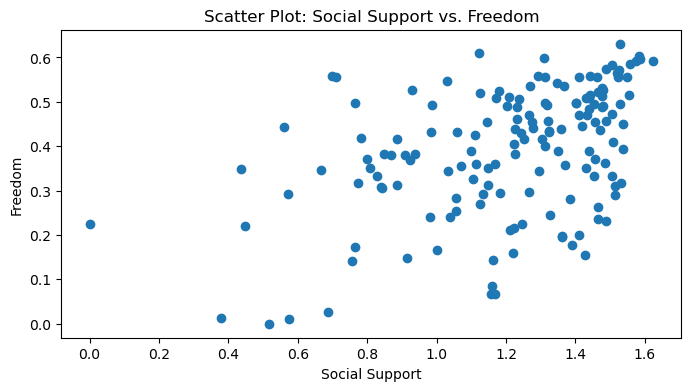

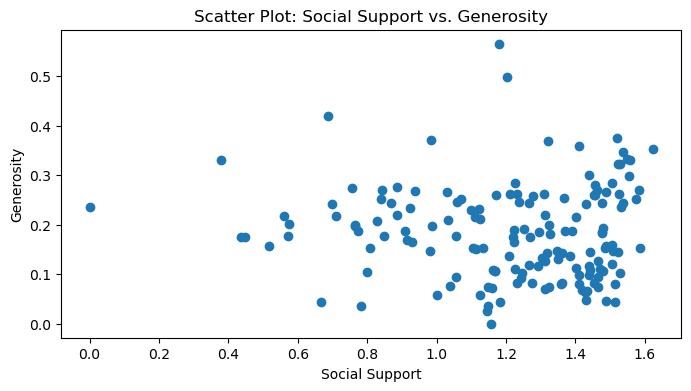

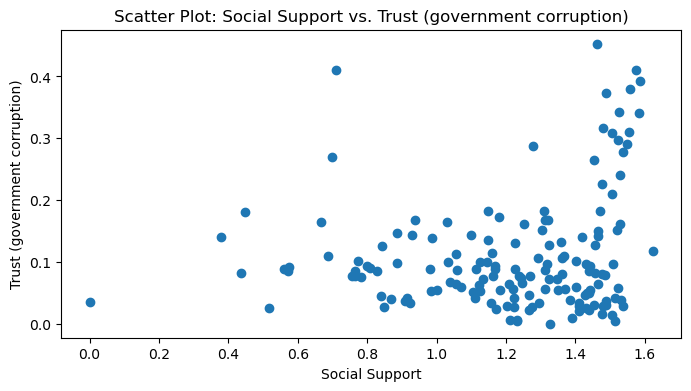

In [51]:

variables = ['GDP per Capita', 'Life Expectancy/Health', 'Freedom', 'Generosity', 'Trust (government corruption)']

for variable in variables:
    plt.figure(figsize=(8, 4))
    plt.scatter(data2019['Social Support'], data2019[variable])
    plt.xlabel('Social Support')
    plt.ylabel(variable)
    plt.title(f'Scatter Plot: Social Support vs. {variable}')
    plt.show()

## Scatter plots: Healthy life Exp vs [Social Support, GDP, Freedom to make life choices, Generosity, Corruption ] 

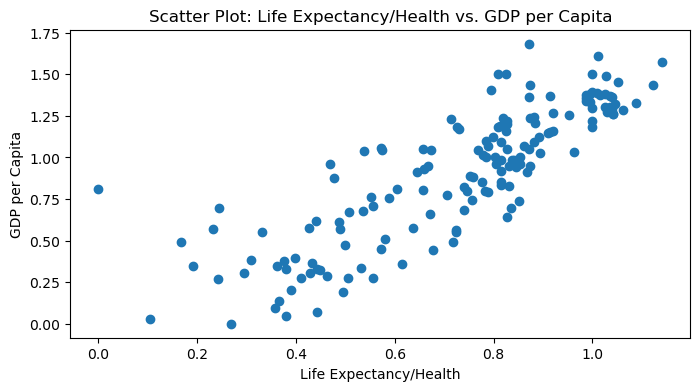

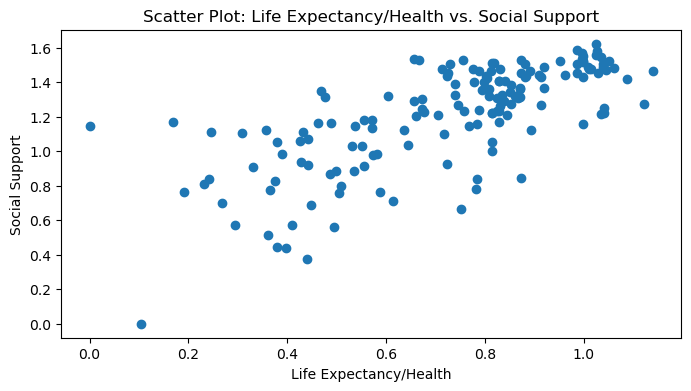

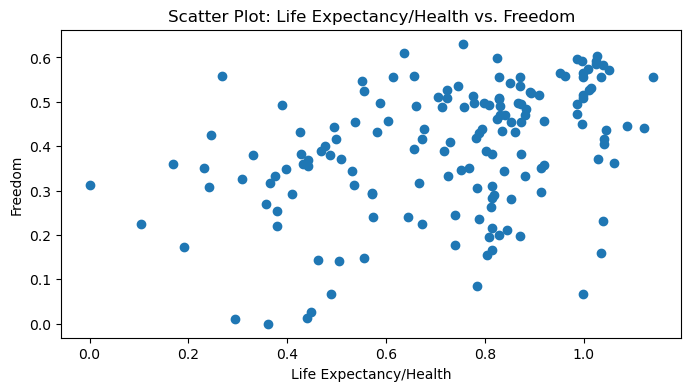

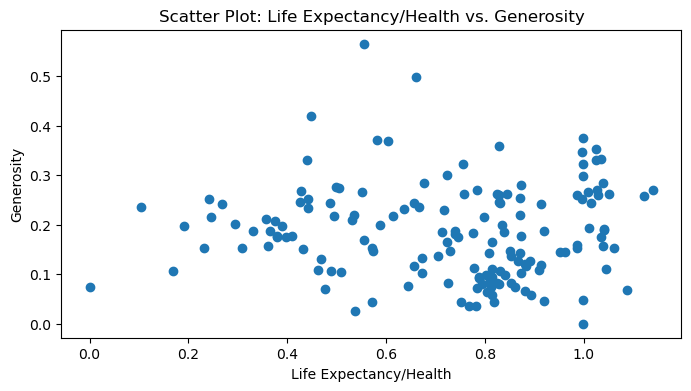

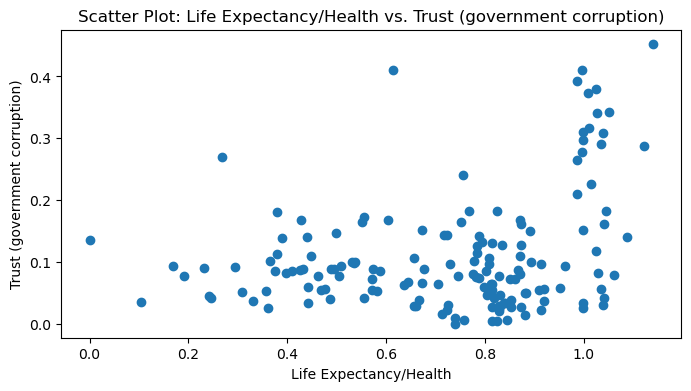

In [52]:
# Scatter plots as an example
variables = ['GDP per Capita', 'Social Support', 'Freedom', 'Generosity', 'Trust (government corruption)']

for variable in variables:
    plt.figure(figsize=(8, 4))
    plt.scatter(data2019['Life Expectancy/Health'], data2019[variable])
    plt.xlabel('Life Expectancy/Health')
    plt.ylabel(variable)
    plt.title(f'Scatter Plot: Life Expectancy/Health vs. {variable}')
    plt.show()

## Scatter plots: Generosity vs [Social Support, GDP, Freedom to make life choices,Life Expectancy/Health , Corruption ] 

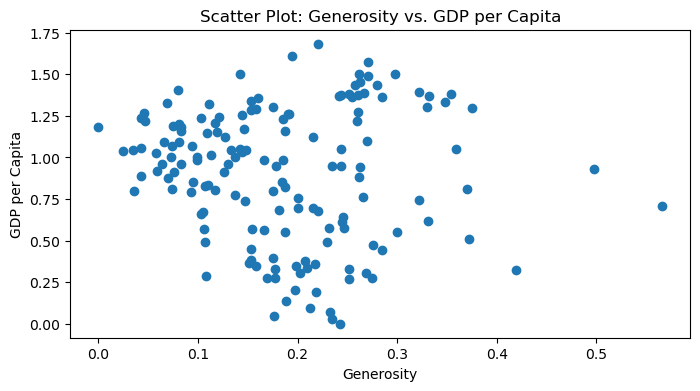

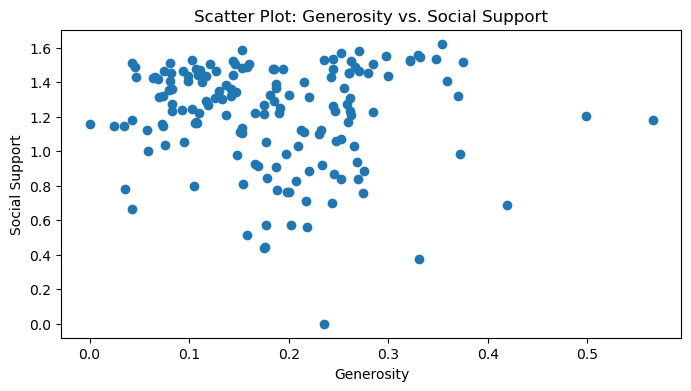

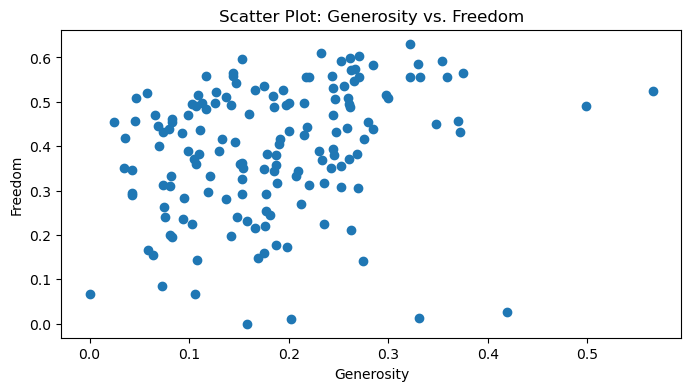

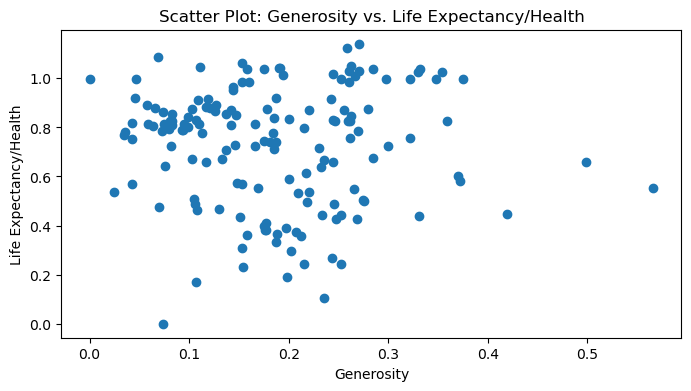

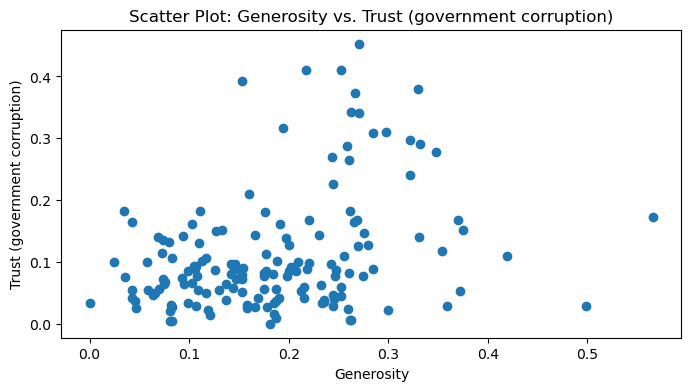

In [53]:

variables = ['GDP per Capita', 'Social Support', 'Freedom', 'Life Expectancy/Health', 'Trust (government corruption)']

for variable in variables:
    plt.figure(figsize=(8, 4))
    plt.scatter(data2019['Generosity'], data2019[variable])
    plt.xlabel('Generosity')
    plt.ylabel(variable)
    plt.title(f'Scatter Plot: Generosity vs. {variable}')
    plt.show()

## Scatter Plot with Regression Line

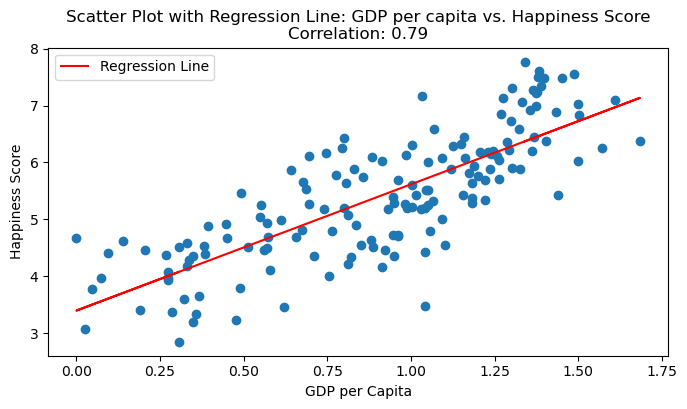

In [50]:
slope, intercept, r_value, p_value, std_err = linregress(data2019['GDP per Capita'], data2019['Happiness Score'])
regression_line = slope * data2019['GDP per Capita'] + intercept

plt.figure(figsize=(8, 4))
plt.scatter(data2019['GDP per Capita'], data2019['Happiness Score'])
plt.plot(data2019['GDP per Capita'], regression_line, color='red', label='Regression Line')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title(f'Scatter Plot with Regression Line: GDP per capita vs. Happiness Score\nCorrelation: {r_value:.2f}')
plt.legend()
plt.show()

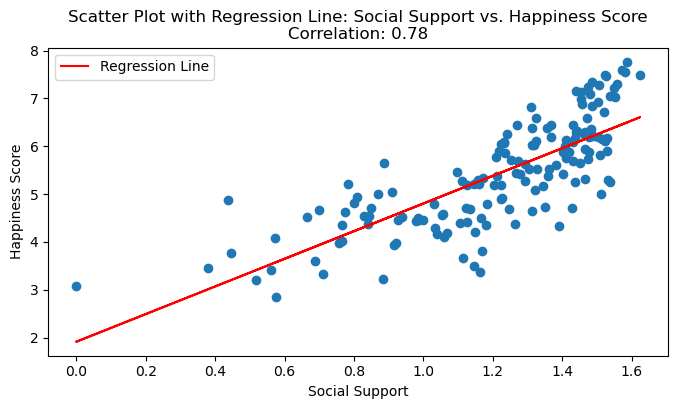

In [54]:
slope, intercept, r_value, p_value, std_err = linregress(data2019['Social Support'], data2019['Happiness Score'])
regression_line = slope * data2019['Social Support'] + intercept

plt.figure(figsize=(8, 4))
plt.scatter(data2019['Social Support'], data2019['Happiness Score'])
plt.plot(data2019['Social Support'], regression_line, color='red', label='Regression Line')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title(f'Scatter Plot with Regression Line: Social Support vs. Happiness Score\nCorrelation: {r_value:.2f}')
plt.legend()
plt.show()

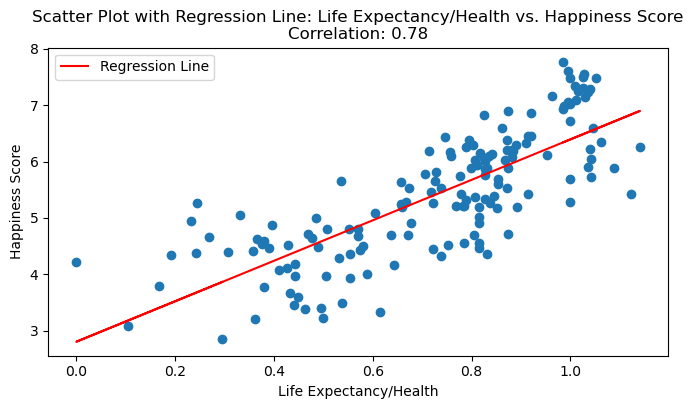

In [55]:
slope, intercept, r_value, p_value, std_err = linregress(data2019['Life Expectancy/Health'], data2019['Happiness Score'])
regression_line = slope * data2019['Life Expectancy/Health'] + intercept

plt.figure(figsize=(8, 4))
plt.scatter(data2019['Life Expectancy/Health'], data2019['Happiness Score'])
plt.plot(data2019['Life Expectancy/Health'], regression_line, color='red', label='Regression Line')
plt.xlabel('Life Expectancy/Health')
plt.ylabel('Happiness Score')
plt.title(f'Scatter Plot with Regression Line: Life Expectancy/Health vs. Happiness Score\nCorrelation: {r_value:.2f}')
plt.legend()
plt.show()

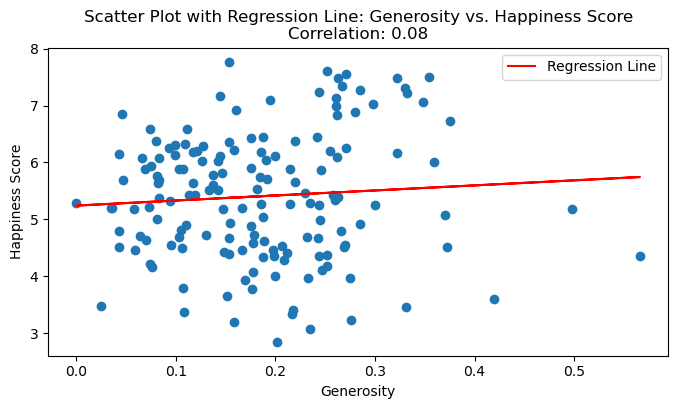

In [56]:
slope, intercept, r_value, p_value, std_err = linregress(data2019['Generosity'], data2019['Happiness Score'])
regression_line = slope * data2019['Generosity'] + intercept

plt.figure(figsize=(8, 4))
plt.scatter(data2019['Generosity'], data2019['Happiness Score'])
plt.plot(data2019['Generosity'], regression_line, color='red', label='Regression Line')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.title(f'Scatter Plot with Regression Line: Generosity vs. Happiness Score\nCorrelation: {r_value:.2f}')
plt.legend()
plt.show()

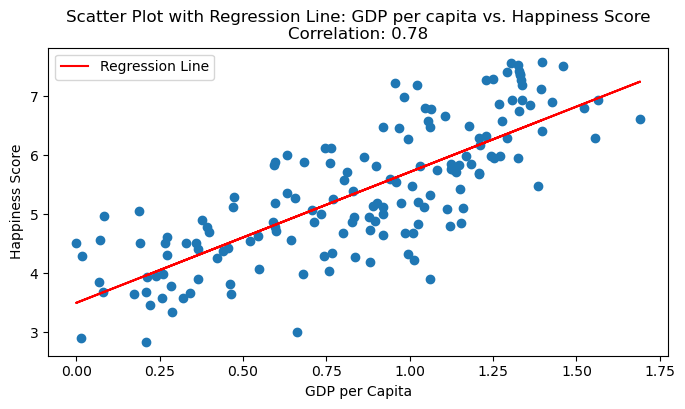

In [57]:
slope, intercept, r_value, p_value, std_err = linregress(data2015['GDP per Capita'], data2015['Happiness Score'])
regression_line = slope * data2015['GDP per Capita'] + intercept

plt.figure(figsize=(8, 4))
plt.scatter(data2015['GDP per Capita'], data2015['Happiness Score'])
plt.plot(data2015['GDP per Capita'], regression_line, color='red', label='Regression Line')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title(f'Scatter Plot with Regression Line: GDP per capita vs. Happiness Score\nCorrelation: {r_value:.2f}')
plt.legend()
plt.show()

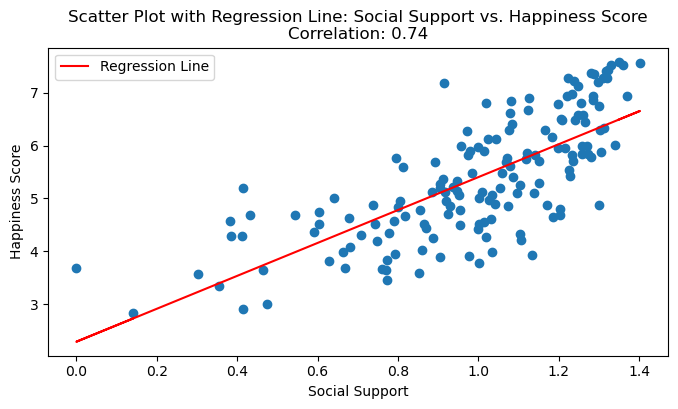

In [58]:
slope, intercept, r_value, p_value, std_err = linregress(data2015['Social Support'], data2015['Happiness Score'])
regression_line = slope * data2015['Social Support'] + intercept

plt.figure(figsize=(8, 4))
plt.scatter(data2015['Social Support'], data2015['Happiness Score'])
plt.plot(data2015['Social Support'], regression_line, color='red', label='Regression Line')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title(f'Scatter Plot with Regression Line: Social Support vs. Happiness Score\nCorrelation: {r_value:.2f}')
plt.legend()
plt.show()

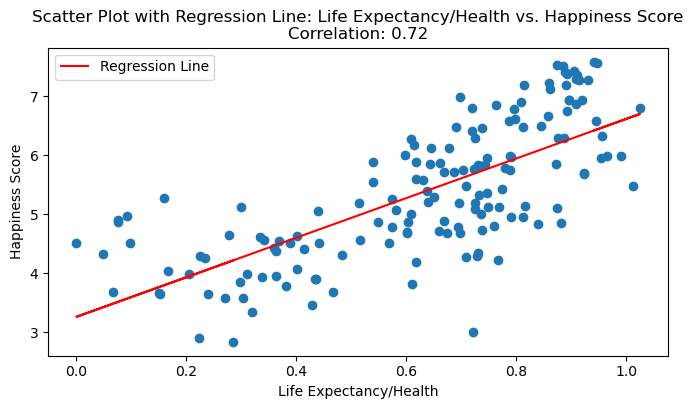

In [59]:
slope, intercept, r_value, p_value, std_err = linregress(data2015['Life Expectancy/Health'], data2015['Happiness Score'])
regression_line = slope * data2015['Life Expectancy/Health'] + intercept

plt.figure(figsize=(8, 4))
plt.scatter(data2015['Life Expectancy/Health'], data2015['Happiness Score'])
plt.plot(data2015['Life Expectancy/Health'], regression_line, color='red', label='Regression Line')
plt.xlabel('Life Expectancy/Health')
plt.ylabel('Happiness Score')
plt.title(f'Scatter Plot with Regression Line: Life Expectancy/Health vs. Happiness Score\nCorrelation: {r_value:.2f}')
plt.legend()
plt.show()

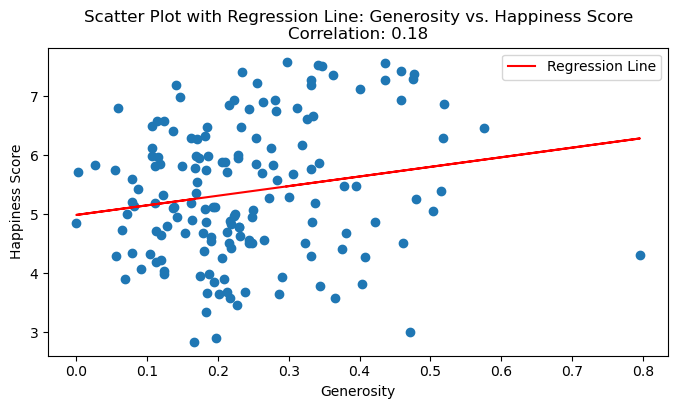

In [60]:
slope, intercept, r_value, p_value, std_err = linregress(data2015['Generosity'], data2015['Happiness Score'])
regression_line = slope * data2015['Generosity'] + intercept

plt.figure(figsize=(8, 4))
plt.scatter(data2015['Generosity'], data2015['Happiness Score'])
plt.plot(data2015['Generosity'], regression_line, color='red', label='Regression Line')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.title(f'Scatter Plot with Regression Line: Generosity vs. Happiness Score\nCorrelation: {r_value:.2f}')
plt.legend()
plt.show()

## Box Plot: Happiness Score vs. GDP per Capita Range

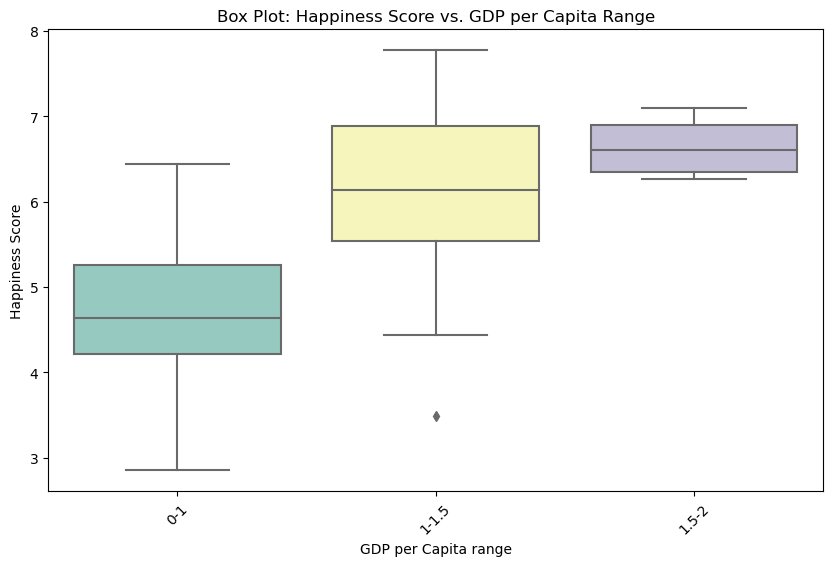

In [61]:
# Create bins for GDP per capita ranges
bins = [0, 1, 1.5, 2]
labels = ['0-1', '1-1.5', '1.5-2']

# Create a new column for GDP per capita ranges
data2019['GDP per Capita range'] = pd.cut(data2019['GDP per Capita'], bins=bins, labels=labels)

# Box plot of Happiness Score for GDP per capita ranges
plt.figure(figsize=(10, 6))
sns.boxplot(x='GDP per Capita range', y='Happiness Score', data=data2019, palette='Set3')
plt.xlabel('GDP per Capita range')
plt.ylabel('Happiness Score')
plt.title('Box Plot: Happiness Score vs. GDP per Capita Range')
plt.xticks(rotation=45)
plt.show()

# Remove the added column for GDP per capita ranges
data2019.drop(columns=['GDP per Capita range'], inplace=True)

# How happiness and different attributes are affected by Social and Cultural Factors?
1. Scatter plot
2. Corellation heatmap
3. Histograms 

## Correlation Coefficient Map for 2019

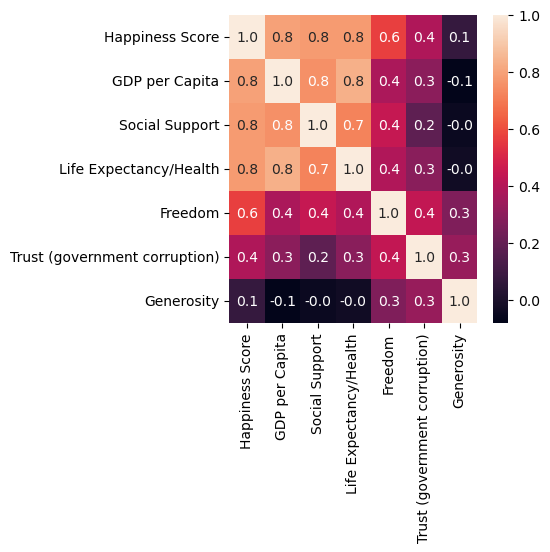

In [62]:
# Corellation heatmap for 2019
data2019.corr()
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(data2019.corr(), annot=True,fmt='.1f',ax=ax) 

# Dismiss an information column
plt.show() 

## Scatter plots for 2019

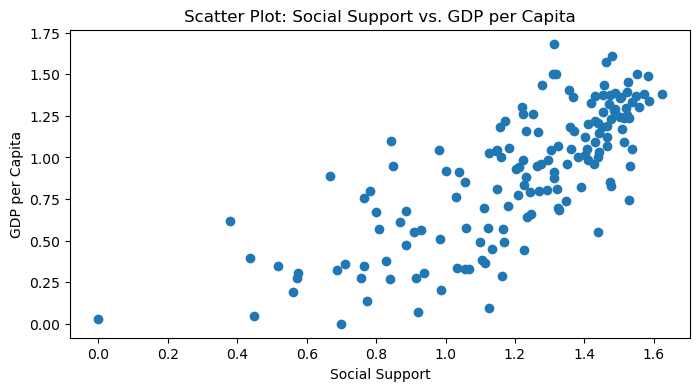

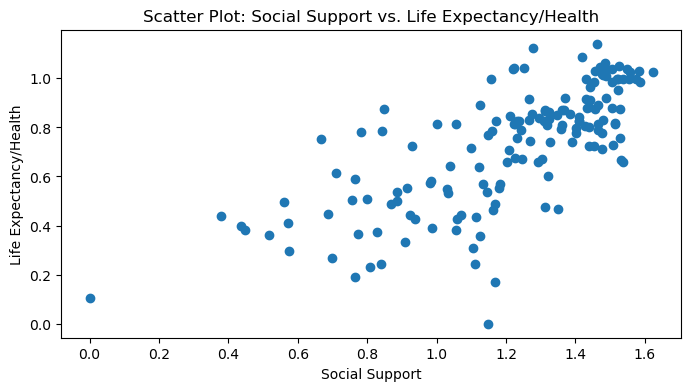

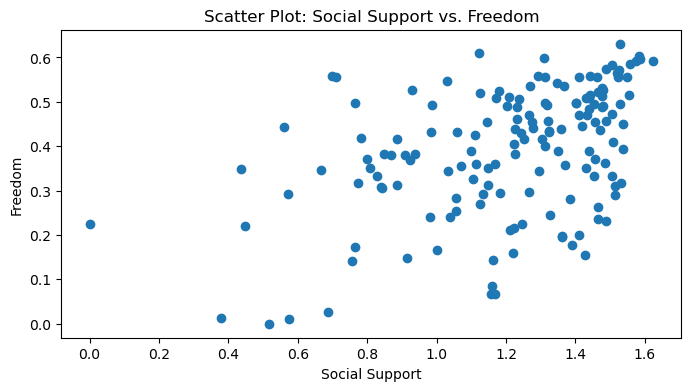

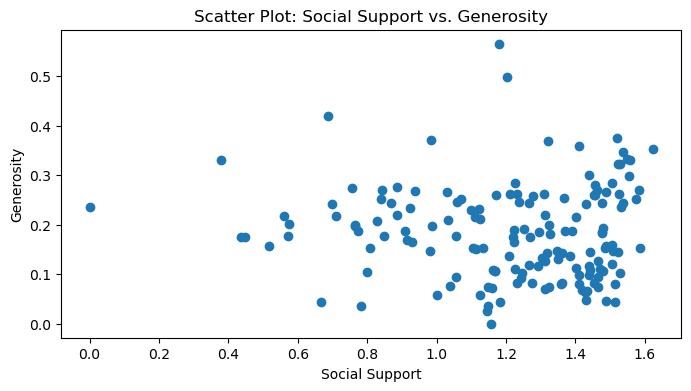

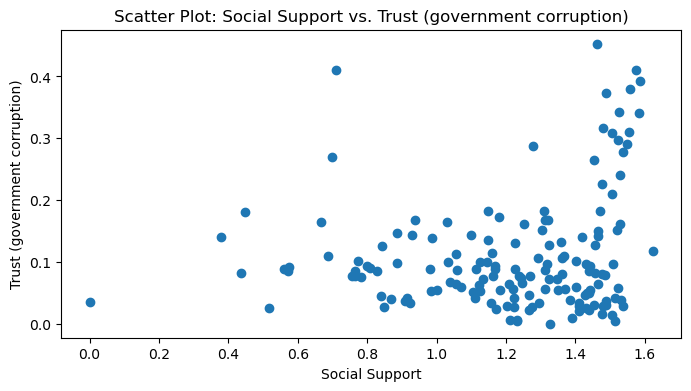

In [63]:
# Scatter plots for 2019
variables = ['GDP per Capita', 'Life Expectancy/Health', 'Freedom', 'Generosity', 'Trust (government corruption)']

for variable in variables:
    plt.figure(figsize=(8, 4))
    plt.scatter(data2019['Social Support'], data2019[variable])
    plt.xlabel('Social Support')
    plt.ylabel(variable)
    plt.title(f'Scatter Plot: Social Support vs. {variable}')
    plt.show()

## Histograms for 2019

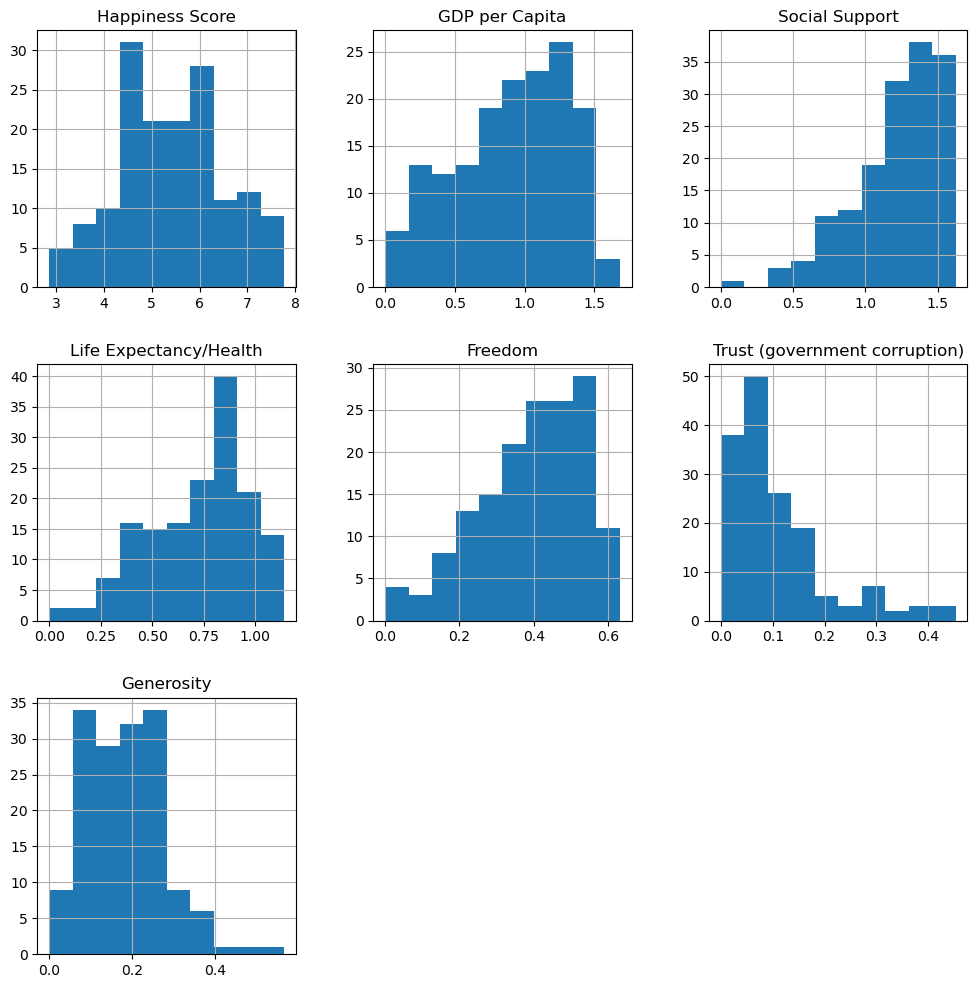

In [64]:
# distribution of all numeric data
plt.rcParams['figure.figsize'] = (12, 12)
data2019.hist();

# Top 3 Countries Happiness 

In [65]:
# Create a dictionary containing coordinates
coordinates = {
    "latitude": [63.2467777, 55.670249, 61.1529386],
    "longitude": [25.9209164, 10.3333283, 8.7876653],
    "City": ["Finland", "Denmark", "Norway"],
    "Population": [5516000, 5794000, 5312000]
}

In [66]:
# Create a Pandas DataFrame containing coordinates
coordinates_df = pd.DataFrame(coordinates)

# Display sample data
coordinates_df

latitude  longitude     City  Population
0  63.246778  25.920916  Finland     5516000
1  55.670249  10.333328  Denmark     5794000
2  61.152939   8.787665   Norway     5312000

In [67]:
# Configure the map plot_1
map_plot_1 = coordinates_df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM"
)

# Display the map plot_1
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]

# Bottom 3 Countries Happiness

In [68]:
# Create a dictionary containing coordinates
coordinates_bottom = {
    "latitude": [7.8699431, 7.0323598, 33.7680065],
    "longitude": [29.6667897, 19.9981227, 66.2385139],
    "City": ["South Sudan", "Central African Republic", "Afghanistan"],
    "Population": [1100000, 460000, 371700000]
}

In [69]:
# Create a Pandas DataFrame containing coordinates
coordinates_bottom = pd.DataFrame(coordinates_bottom)

# Display sample data
coordinates_bottom

latitude  longitude                      City  Population
0   7.869943  29.666790               South Sudan     1100000
1   7.032360  19.998123  Central African Republic      460000
2  33.768006  66.238514               Afghanistan   371700000

In [70]:
# Configure the map plot_1
map_plot_1 = coordinates_bottom.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM"
)

# Display the map plot_1
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]

In [ ]:
top =top_10_countries_G.sort_values(['GDP per capita'],ascending = 0)[:10]
ax = sns.barplot(x ='GDP per capita' , y = 'Country or region' , data = top)
ax.set_xlabel('GDP per capita', size = 10)
ax.set_ylabel('Country', size = 10)
ax.set_title("Top 10 Countries with high GDP per capita", size = 10)
# Add labels to the bars with adjusted positions
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='center', fontsize=10, color='white', padding=3)

## Bar Plot: Top 10 Countries with different attributes

In [73]:
top_10_countries_G = data2019.sort_values(by='GDP per Capita', ascending=False).head(10)
top_10_countries_G

Country  Happiness Score  GDP per Capita  Social Support  \
28                 Qatar            6.374           1.684           1.313   
13            Luxembourg            7.090           1.609           1.479   
33             Singapore            6.262           1.572           1.463   
20  United Arab Emirates            6.825           1.503           1.310   
50                Kuwait            6.021           1.500           1.319   
15               Ireland            7.021           1.499           1.553   
2                 Norway            7.554           1.488           1.582   
5            Switzerland            7.480           1.452           1.526   
75             Hong Kong            5.430           1.438           1.277   
18         United States            6.892           1.433           1.457   

    Life Expectancy/Health  Freedom  Trust (government corruption)  Generosity  
28                   0.871    0.555                          0.167       0.220  
13                   1.012    0.526                          0.316       0.194  
33                   1.141    0.556                          0.453       0.271  
20                   0.825    0.598                          0.182       0.262  
50                   0.808    0.493                          0.097       0.142  
15                   0.999    0.516                          0.310       0.298  
2                    1.028    0.603                          0.341       0.271  
5                    1.052    0.572                          0.343       0.263  
75                   1.122    0.440                          0.287       0.258  
18                   0.874    0.454                          0.128       0.280

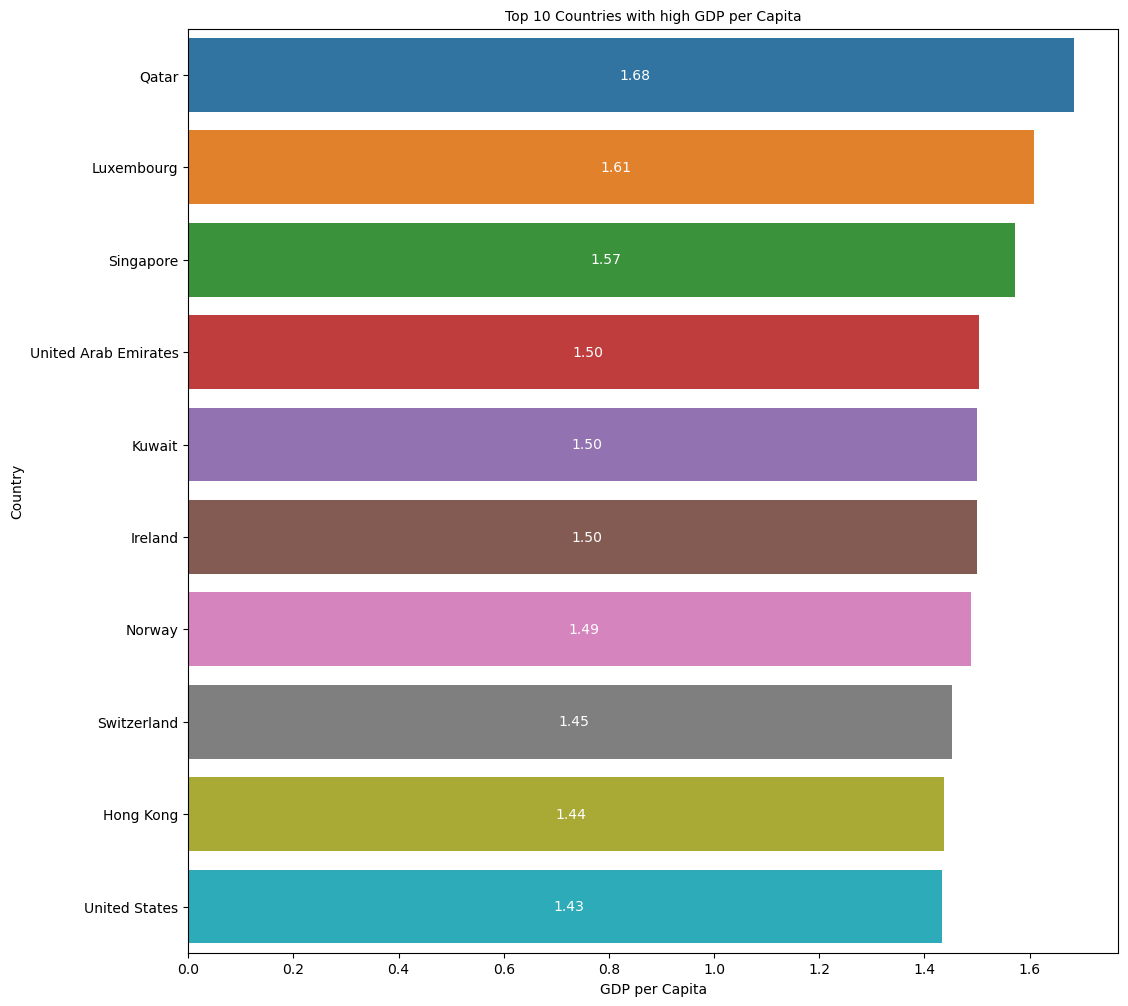

In [77]:
top =top_10_countries_G.sort_values(['GDP per Capita'],ascending = 0)[:10]
ax = sns.barplot(x ='GDP per Capita' , y = 'Country' , data = top)
ax.set_xlabel('GDP per Capita', size = 10)
ax.set_ylabel('Country', size = 10)
ax.set_title("Top 10 Countries with high GDP per Capita", size = 10)
# Add labels to the bars with adjusted positions
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='center', fontsize=10, color='white', padding=3)

In [79]:
top_10_countries_H = data2019.sort_values(by='Happiness Score', ascending=False).head(10)
top_10_countries_H

Country  Happiness Score  GDP per Capita  Social Support  \
0      Finland            7.769           1.340           1.587   
1      Denmark            7.600           1.383           1.573   
2       Norway            7.554           1.488           1.582   
3      Iceland            7.494           1.380           1.624   
4  Netherlands            7.488           1.396           1.522   
5  Switzerland            7.480           1.452           1.526   
6       Sweden            7.343           1.387           1.487   
7  New Zealand            7.307           1.303           1.557   
8       Canada            7.278           1.365           1.505   
9      Austria            7.246           1.376           1.475   

   Life Expectancy/Health  Freedom  Trust (government corruption)  Generosity  
0                   0.986    0.596                          0.393       0.153  
1                   0.996    0.592                          0.410       0.252  
2                   1.028    0.603                          0.341       0.271  
3                   1.026    0.591                          0.118       0.354  
4                   0.999    0.557                          0.298       0.322  
5                   1.052    0.572                          0.343       0.263  
6                   1.009    0.574                          0.373       0.267  
7                   1.026    0.585                          0.380       0.330  
8                   1.039    0.584                          0.308       0.285  
9                   1.016    0.532                          0.226       0.244

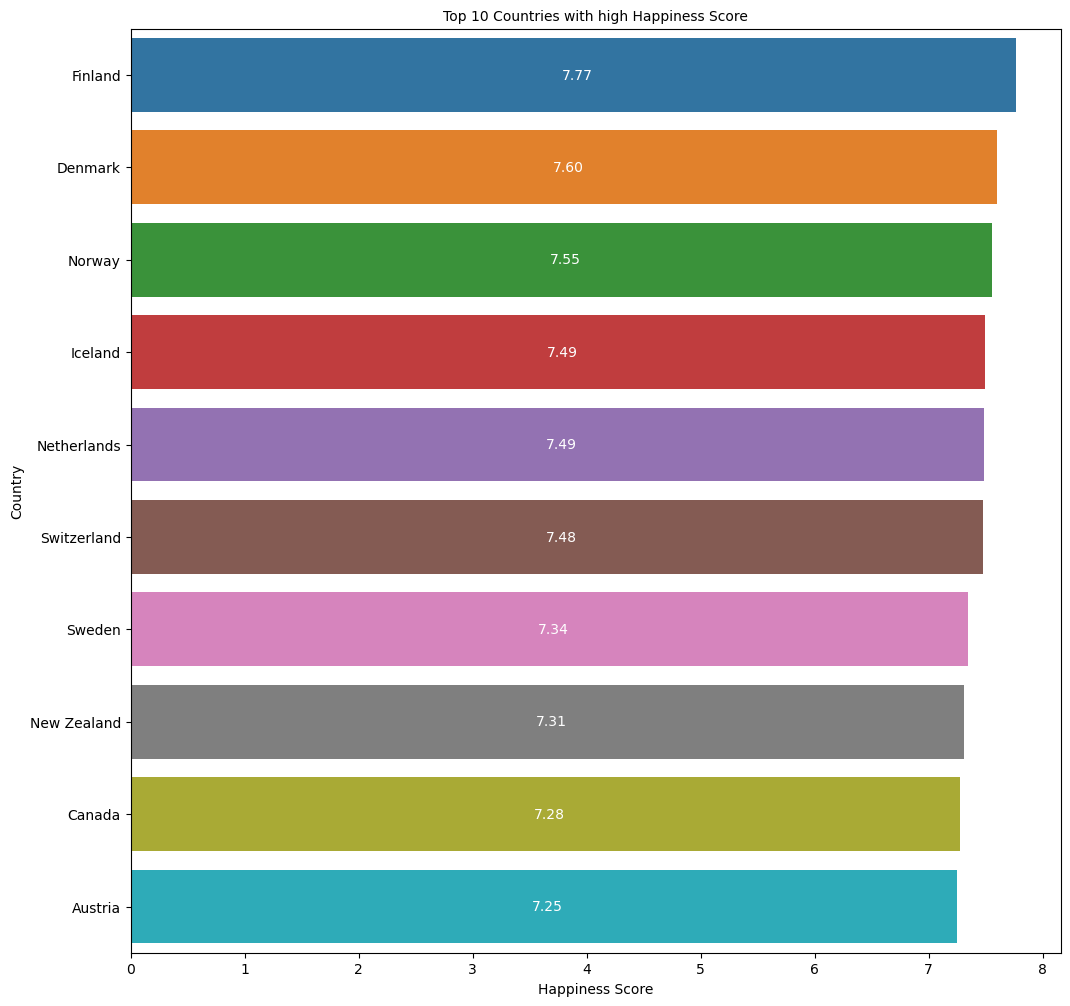

In [80]:
top =top_10_countries_H.sort_values(['Happiness Score'],ascending = 0)[:10]
ax = sns.barplot(x ='Happiness Score' , y = 'Country' , data = top)
ax.set_xlabel('Happiness Score', size = 10)
ax.set_ylabel('Country', size = 10)
ax.set_title("Top 10 Countries with high Happiness Score", size = 10)
# Add labels to the bars with adjusted positions
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='center', fontsize=10, color='white', padding=3)

In [82]:
top_10_countries_s = data2019.sort_values(by='Social Support', ascending=False).head(10)
top_10_countries_s

Country  Happiness Score  GDP per Capita  Social Support  \
3          Iceland            7.494           1.380           1.624   
0          Finland            7.769           1.340           1.587   
2           Norway            7.554           1.488           1.582   
1          Denmark            7.600           1.383           1.573   
7      New Zealand            7.307           1.303           1.557   
15         Ireland            7.021           1.499           1.553   
10       Australia            7.228           1.372           1.548   
86    Turkmenistan            5.247           1.052           1.538   
14  United Kingdom            7.054           1.333           1.538   
82        Mongolia            5.285           0.948           1.531   

    Life Expectancy/Health  Freedom  Trust (government corruption)  Generosity  
3                    1.026    0.591                          0.118       0.354  
0                    0.986    0.596                          0.393       0.153  
2                    1.028    0.603                          0.341       0.271  
1                    0.996    0.592                          0.410       0.252  
7                    1.026    0.585                          0.380       0.330  
15                   0.999    0.516                          0.310       0.298  
10                   1.036    0.557                          0.290       0.332  
86                   0.657    0.394                          0.028       0.244  
14                   0.996    0.450                          0.278       0.348  
82                   0.667    0.317                          0.038       0.235

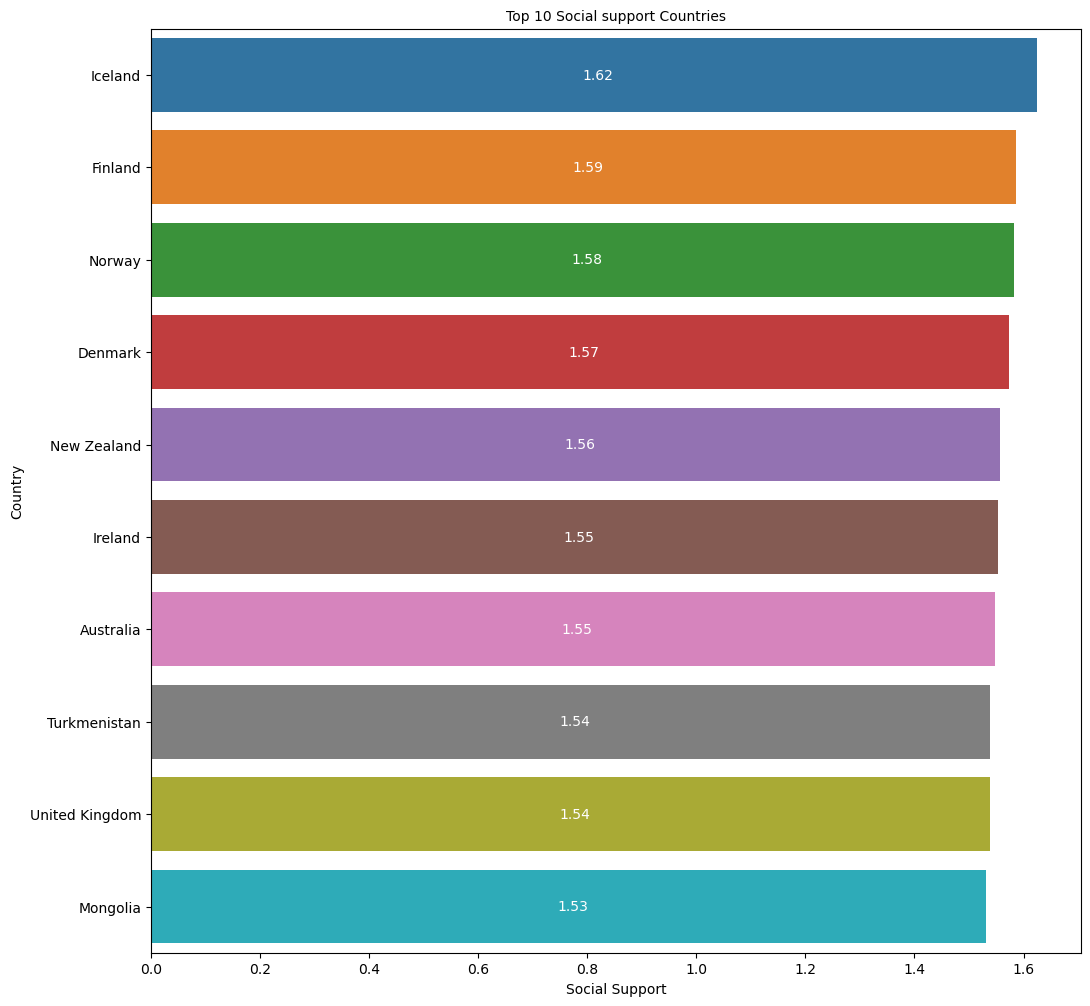

In [83]:
top =top_10_countries_s.sort_values(['Social Support'],ascending = 0)[:10]
ax = sns.barplot(x ='Social Support' , y = 'Country' , data = top)
ax.set_xlabel('Social Support', size = 10)
ax.set_ylabel('Country', size = 10)
ax.set_title("Top 10 Social support Countries", size = 10)
# Add labels to the bars with adjusted positions
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='center', fontsize=10, color='white', padding=3)

In [84]:
top_10_countries_g = data2019.sort_values(by='Generosity', ascending=False).head(10)
top_10_countries_g

Country  Happiness Score  GDP per Capita  Social Support  \
130         Myanmar            4.360           0.710           1.181   
91        Indonesia            5.192           0.931           1.203   
146           Haiti            3.597           0.323           0.688   
21            Malta            6.726           1.300           1.520   
120           Kenya            4.509           0.512           0.983   
94           Bhutan            5.082           0.813           1.321   
51         Thailand            6.008           1.050           1.409   
3           Iceland            7.494           1.380           1.624   
14   United Kingdom            7.054           1.333           1.538   
10        Australia            7.228           1.372           1.548   

     Life Expectancy/Health  Freedom  Trust (government corruption)  \
130                   0.555    0.525                          0.172   
91                    0.660    0.491                          0.028   
146                   0.449    0.026                          0.110   
21                    0.999    0.564                          0.151   
120                   0.581    0.431                          0.053   
94                    0.604    0.457                          0.167   
51                    0.828    0.557                          0.028   
3                     1.026    0.591                          0.118   
14                    0.996    0.450                          0.278   
10                    1.036    0.557                          0.290   

     Generosity  
130       0.566  
91        0.498  
146       0.419  
21        0.375  
120       0.372  
94        0.370  
51        0.359  
3         0.354  
14        0.348  
10        0.332

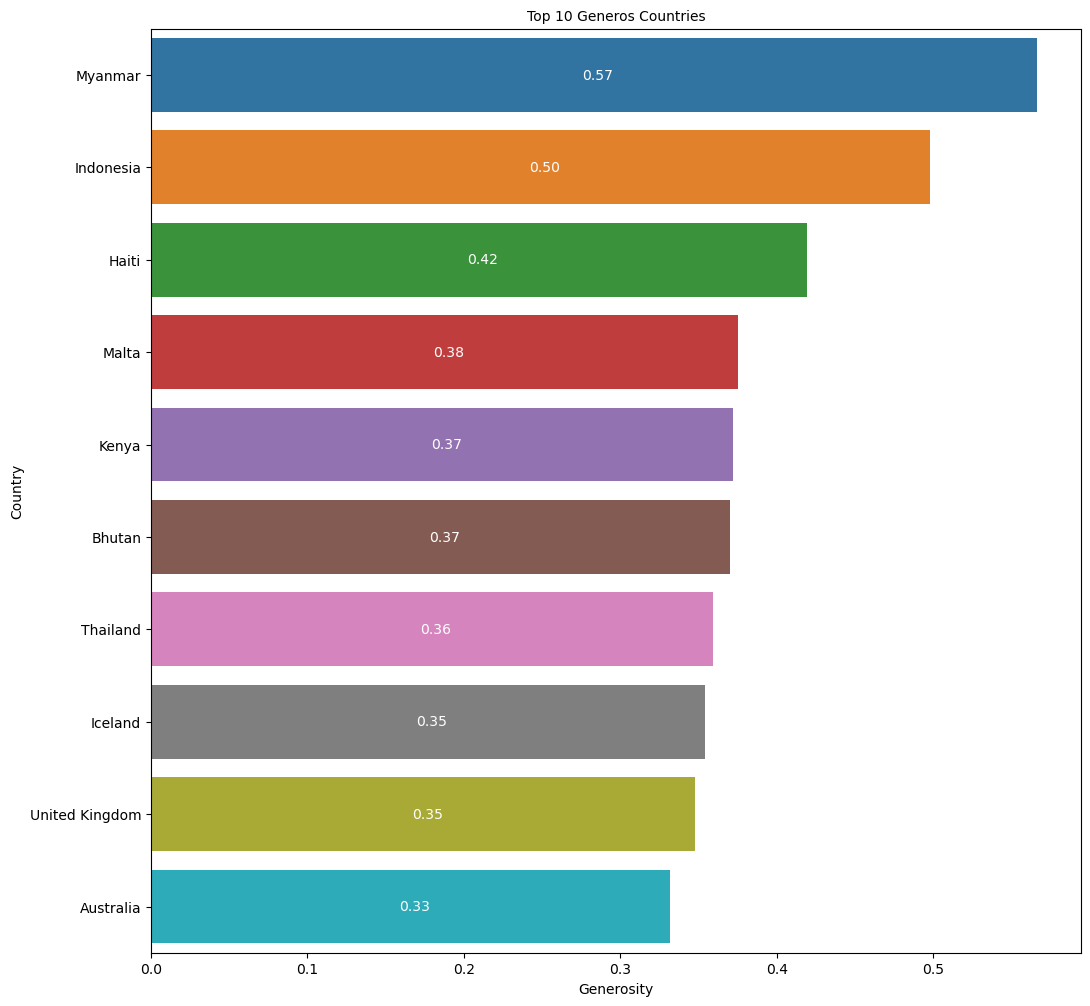

In [85]:
top =top_10_countries_g.sort_values(['Generosity'],ascending = 0)[:10]
ax = sns.barplot(x ='Generosity' , y = 'Country' , data = top)
ax.set_xlabel('Generosity', size = 10)
ax.set_ylabel('Country', size = 10)
ax.set_title("Top 10 Generos Countries", size = 10)
# Add labels to the bars with adjusted positions
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='center', fontsize=10, color='white', padding=3)

## Bar Plot:  Bottom  10 Countries with different attributes

In [87]:
bottom_10_countries_S = data2019.sort_values(by='Social Support').head(10)
bottom_10_countries_S

Country  Happiness Score  GDP per Capita  \
154  Central African Republic            3.083           0.026   
148                     Syria            3.462           0.619   
101                     Benin            4.883           0.393   
144                   Burundi            3.775           0.046   
153               Afghanistan            3.203           0.350   
149                    Malawi            3.410           0.191   
138                      Togo            4.085           0.275   
155               South Sudan            2.853           0.306   
118                   Georgia            4.519           0.886   
146                     Haiti            3.597           0.323   

     Social Support  Life Expectancy/Health  Freedom  \
154           0.000                   0.105    0.225   
148           0.378                   0.440    0.013   
101           0.437                   0.397    0.349   
144           0.447                   0.380    0.220   
153           0.517                   0.361    0.000   
149           0.560                   0.495    0.443   
138           0.572                   0.410    0.293   
155           0.575                   0.295    0.010   
118           0.666                   0.752    0.346   
146           0.688                   0.449    0.026   

     Trust (government corruption)  Generosity  
154                          0.035       0.235  
148                          0.141       0.331  
101                          0.082       0.175  
144                          0.180       0.176  
153                          0.025       0.158  
149                          0.089       0.218  
138                          0.085       0.177  
155                          0.091       0.202  
118                          0.164       0.043  
146                          0.110       0.419

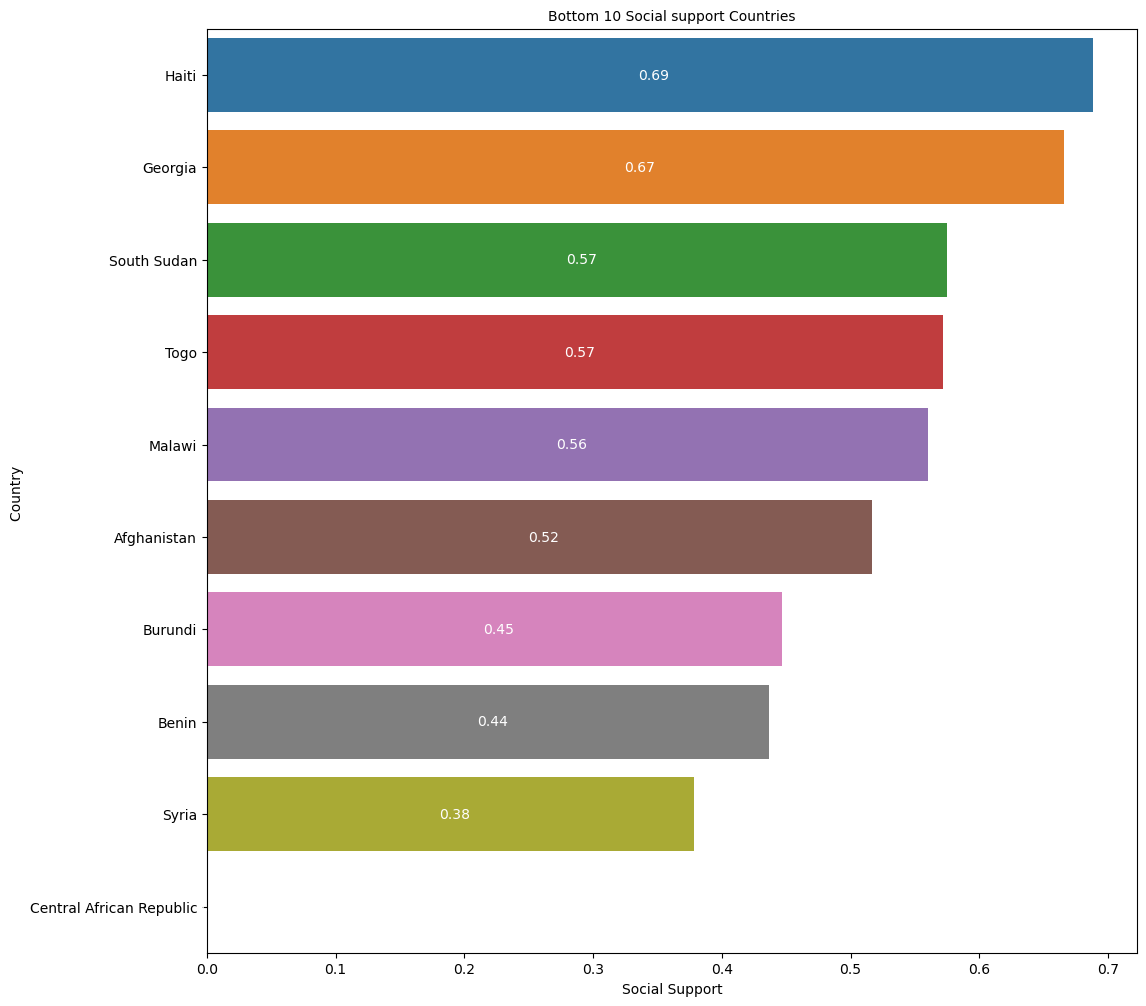

In [88]:
top =bottom_10_countries_S.sort_values(['Social Support'],ascending = 0)[:10]
ax = sns.barplot(x ='Social Support' , y = 'Country' , data = top)
ax.set_xlabel('Social Support', size = 10)
ax.set_ylabel('Country ', size = 10)
ax.set_title("Bottom 10 Social support Countries", size = 10)
# Add labels to the bars with adjusted positions
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='center', fontsize=10, color='white', padding=3)

In [89]:
bottom_10_countries_G = data2019.sort_values(by='Generosity').head(10)
bottom_10_countries_G

Country  Happiness Score  GDP per Capita  Social Support  \
81           Greece            5.287           1.181           1.156   
147        Botswana            3.488           1.041           1.145   
89       Azerbaijan            5.208           1.043           1.147   
88          Morocco            5.208           0.801           0.782   
41        Lithuania            6.149           1.238           1.515   
118         Georgia            4.519           0.886           0.666   
103           Gabon            4.799           1.057           1.183   
19   Czech Republic            6.852           1.269           1.487   
65         Portugal            5.693           1.221           1.431   
92            China            5.191           1.029           1.125   

     Life Expectancy/Health  Freedom  Trust (government corruption)  \
81                    0.999    0.067                          0.034   
147                   0.538    0.455                          0.100   
89                    0.769    0.351                          0.182   
88                    0.782    0.418                          0.076   
41                    0.818    0.291                          0.042   
118                   0.752    0.346                          0.164   
103                   0.571    0.295                          0.055   
19                    0.920    0.457                          0.036   
65                    0.999    0.508                          0.025   
92                    0.893    0.521                          0.100   

     Generosity  
81        0.000  
147       0.025  
89        0.035  
88        0.036  
41        0.043  
118       0.043  
103       0.043  
19        0.046  
65        0.047  
92        0.058

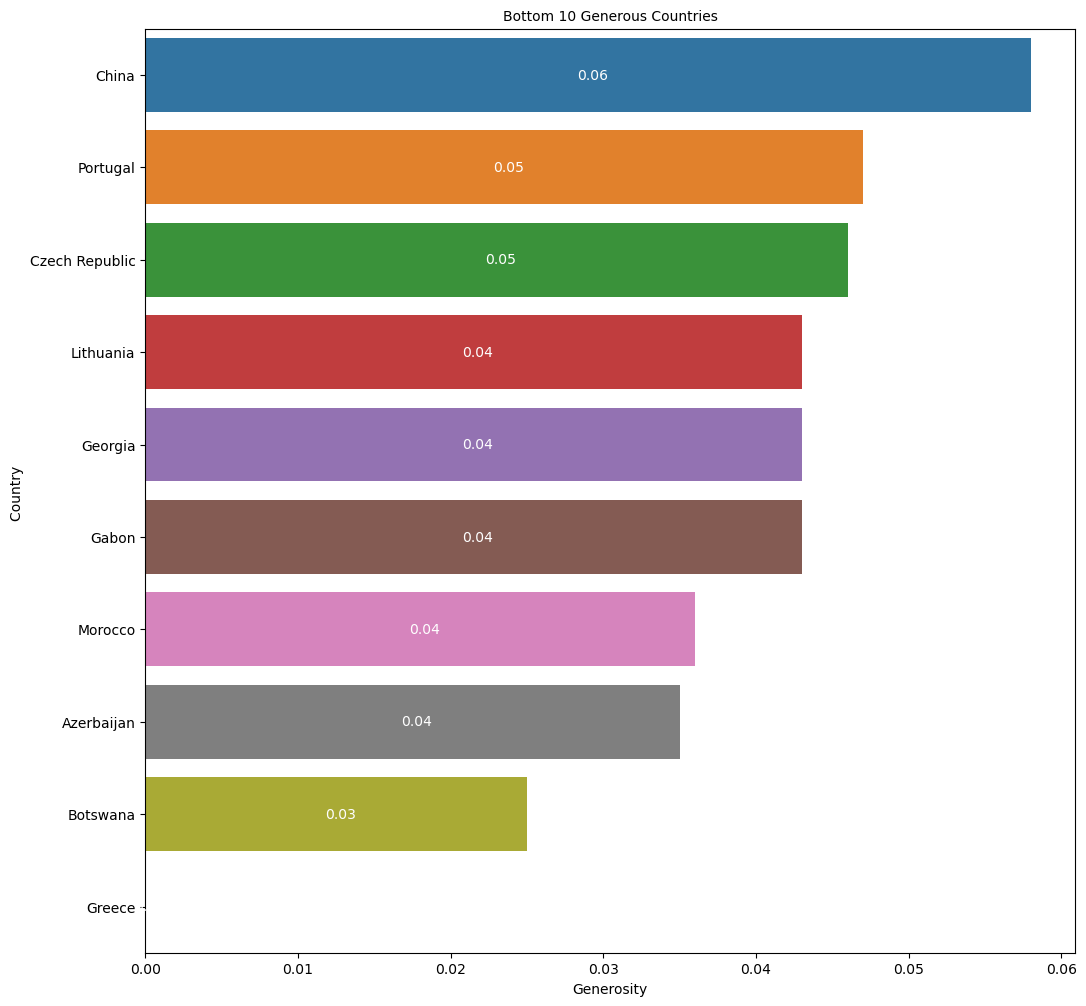

In [90]:
top =bottom_10_countries_G.sort_values(['Generosity'],ascending = 0)[:10]
ax = sns.barplot(x ='Generosity' , y = 'Country' , data = top)
ax.set_xlabel('Generosity', size = 10)
ax.set_ylabel('Country ', size = 10)
ax.set_title("Bottom 10 Generous Countries", size = 10)
# Add labels to the bars with adjusted positions
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='center', fontsize=10, color='white', padding=3)

In [92]:
bottom_10_countries_g = data2019.sort_values(by='GDP per Capita').head(10)
bottom_10_countries_g

Country  Happiness Score  GDP per Capita  \
111                   Somalia            4.668           0.000   
154  Central African Republic            3.083           0.026   
144                   Burundi            3.775           0.046   
140                   Liberia            3.975           0.073   
126          Congo (Kinshasa)            4.418           0.094   
113                     Niger            4.628           0.138   
149                    Malawi            3.410           0.191   
122                Mozambique            4.466           0.204   
128              Sierra Leone            4.374           0.268   
142                Madagascar            3.933           0.274   

     Social Support  Life Expectancy/Health  Freedom  \
111           0.698                   0.268    0.559   
154           0.000                   0.105    0.225   
144           0.447                   0.380    0.220   
140           0.922                   0.443    0.370   
126           1.125                   0.357    0.269   
113           0.774                   0.366    0.318   
149           0.560                   0.495    0.443   
122           0.986                   0.390    0.494   
128           0.841                   0.242    0.309   
142           0.916                   0.555    0.148   

     Trust (government corruption)  Generosity  
111                          0.270       0.243  
154                          0.035       0.235  
144                          0.180       0.176  
140                          0.033       0.233  
126                          0.053       0.212  
113                          0.102       0.188  
149                          0.089       0.218  
122                          0.138       0.197  
128                          0.045       0.252  
142                          0.041       0.169

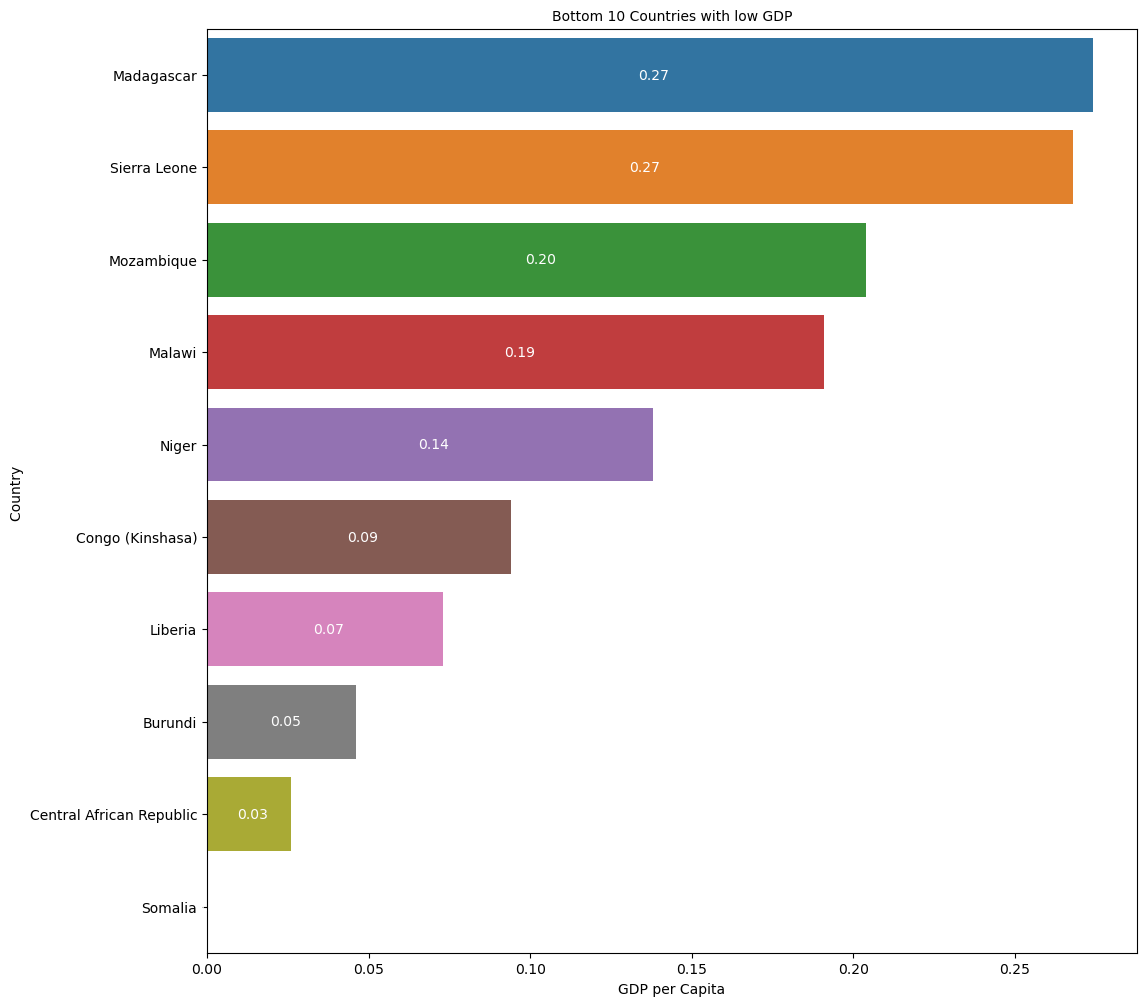

In [94]:
top =bottom_10_countries_g.sort_values(['GDP per Capita'],ascending = 0)[:10]
ax = sns.barplot(x ='GDP per Capita' , y = 'Country' , data = top)
ax.set_xlabel('GDP per Capita', size = 10)
ax.set_ylabel('Country ', size = 10)
ax.set_title("Bottom 10 Countries with low GDP", size = 10)
# Add labels to the bars with adjusted positions
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='center', fontsize=10, color='white', padding=3)

In [96]:
bottom_10_countries_s = data2019.sort_values(by='Happiness Score').head(10)
bottom_10_countries_s

Country  Happiness Score  GDP per Capita  \
155               South Sudan            2.853           0.306   
154  Central African Republic            3.083           0.026   
153               Afghanistan            3.203           0.350   
152                  Tanzania            3.231           0.476   
151                    Rwanda            3.334           0.359   
150                     Yemen            3.380           0.287   
149                    Malawi            3.410           0.191   
148                     Syria            3.462           0.619   
147                  Botswana            3.488           1.041   
146                     Haiti            3.597           0.323   

     Social Support  Life Expectancy/Health  Freedom  \
155           0.575                   0.295    0.010   
154           0.000                   0.105    0.225   
153           0.517                   0.361    0.000   
152           0.885                   0.499    0.417   
151           0.711                   0.614    0.555   
150           1.163                   0.463    0.143   
149           0.560                   0.495    0.443   
148           0.378                   0.440    0.013   
147           1.145                   0.538    0.455   
146           0.688                   0.449    0.026   

     Trust (government corruption)  Generosity  
155                          0.091       0.202  
154                          0.035       0.235  
153                          0.025       0.158  
152                          0.147       0.276  
151                          0.411       0.217  
150                          0.077       0.108  
149                          0.089       0.218  
148                          0.141       0.331  
147                          0.100       0.025  
146                          0.110       0.419

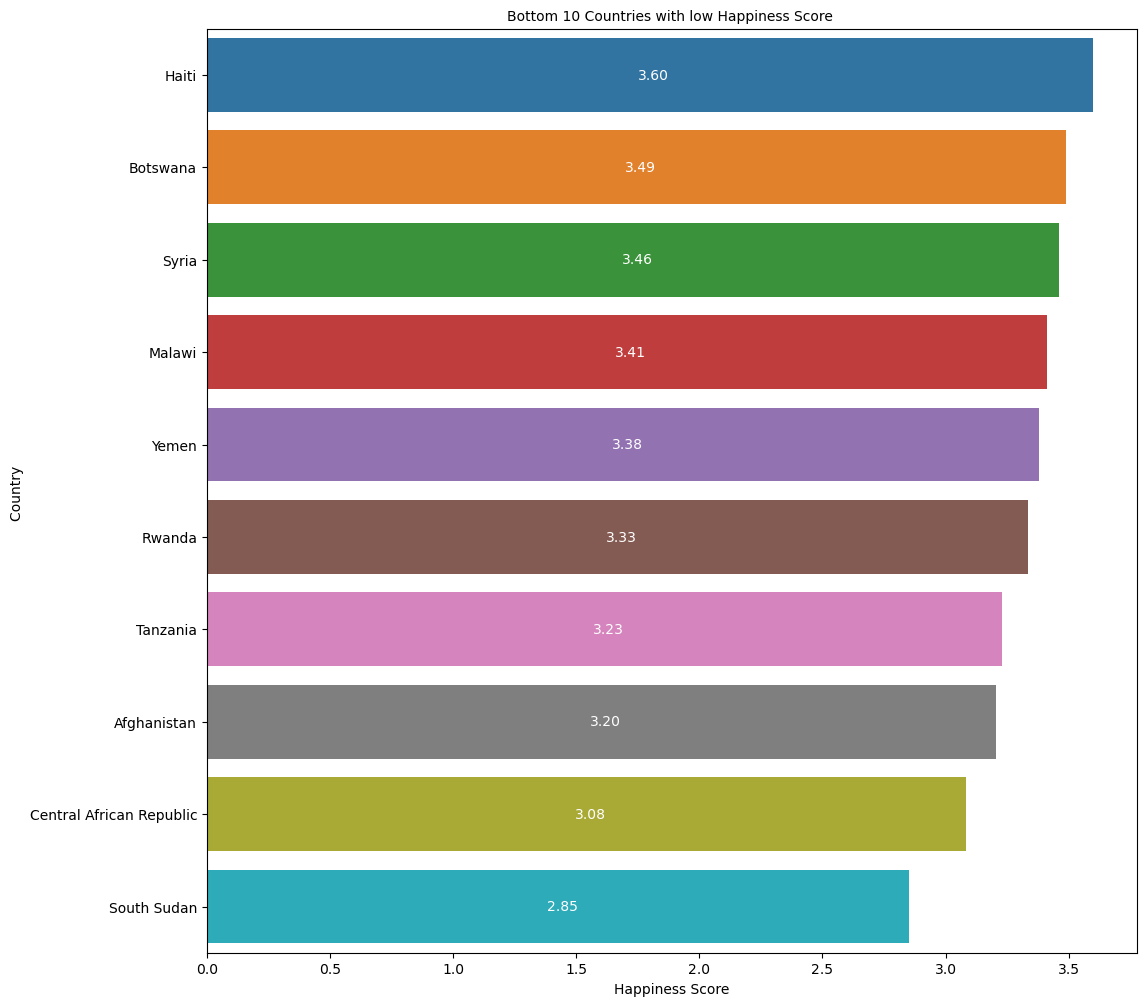

In [98]:
top =bottom_10_countries_s.sort_values(['Happiness Score'],ascending = 0)[:10]
ax = sns.barplot(x ='Happiness Score' , y = 'Country' , data = top)
ax.set_xlabel('Happiness Score', size = 10)
ax.set_ylabel('Country ', size = 10)
ax.set_title("Bottom 10 Countries with low Happiness Score ", size = 10)
# Add labels to the bars with adjusted positions
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='center', fontsize=10, color='white', padding=3)

## Histogram visualization:

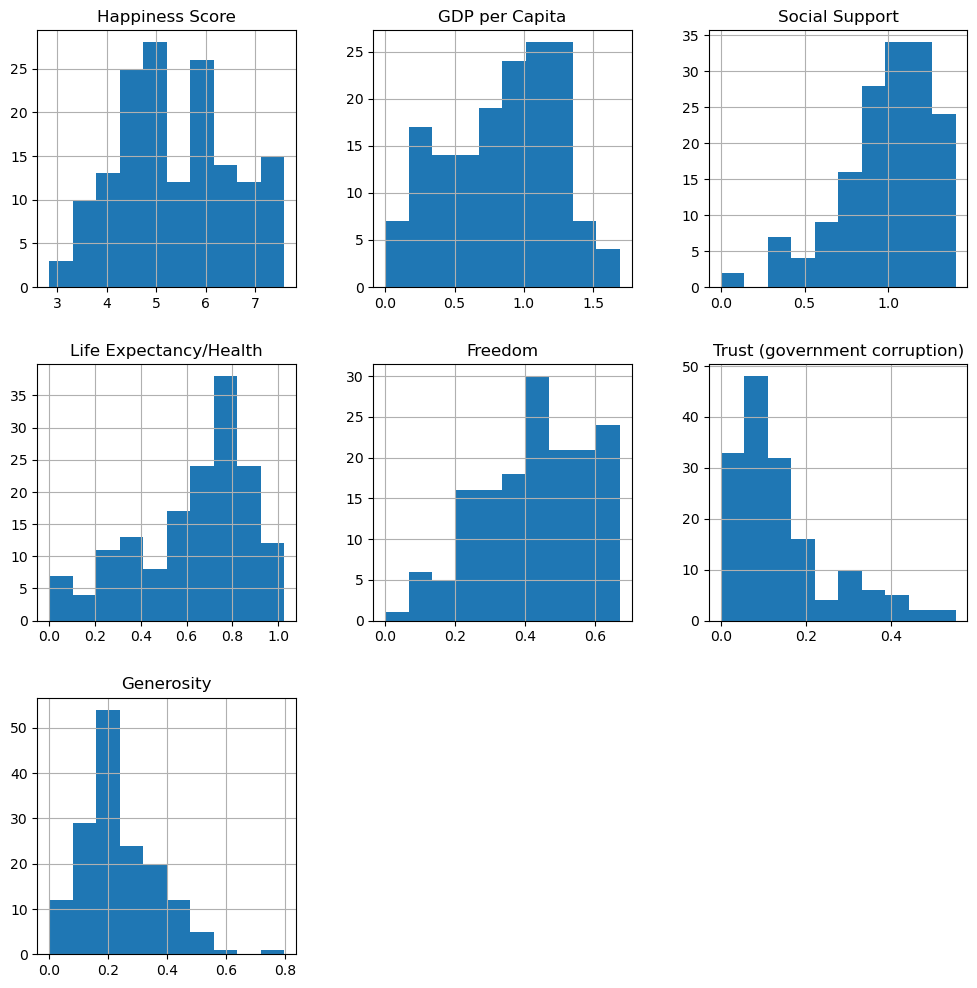

In [106]:
# distribution of all numeric data
plt.rcParams['figure.figsize'] = (12, 12)
data2015.hist();

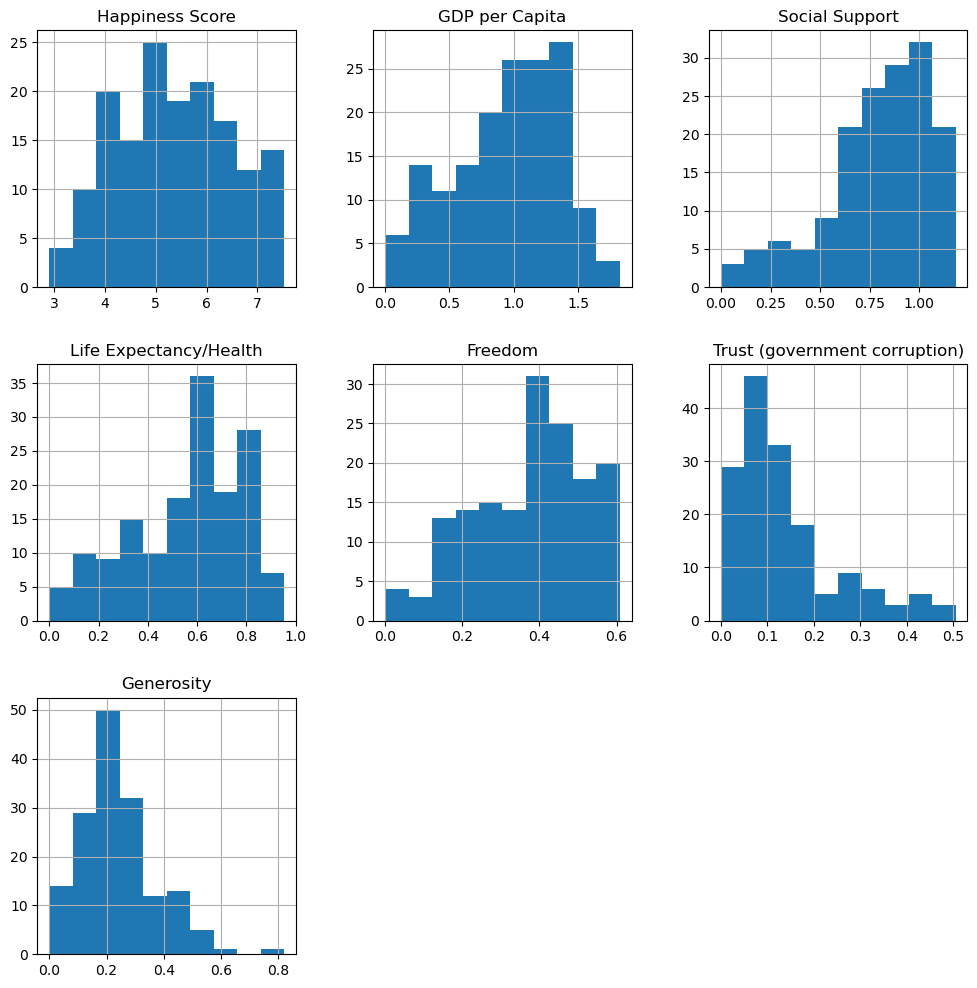

In [107]:
# distribution of all numeric data
plt.rcParams['figure.figsize'] = (12, 12)
data2016.hist();

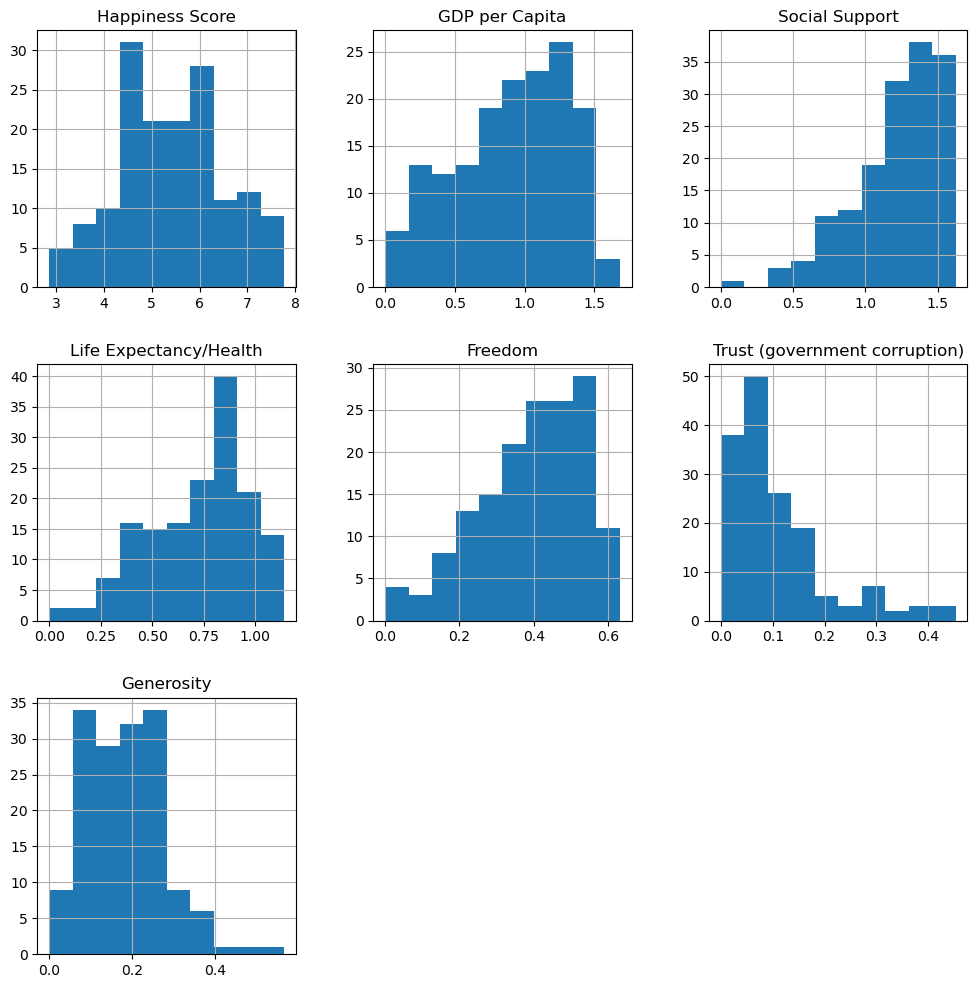

In [108]:
# distribution of all numeric data
plt.rcParams['figure.figsize'] = (12, 12)
data2019.hist();

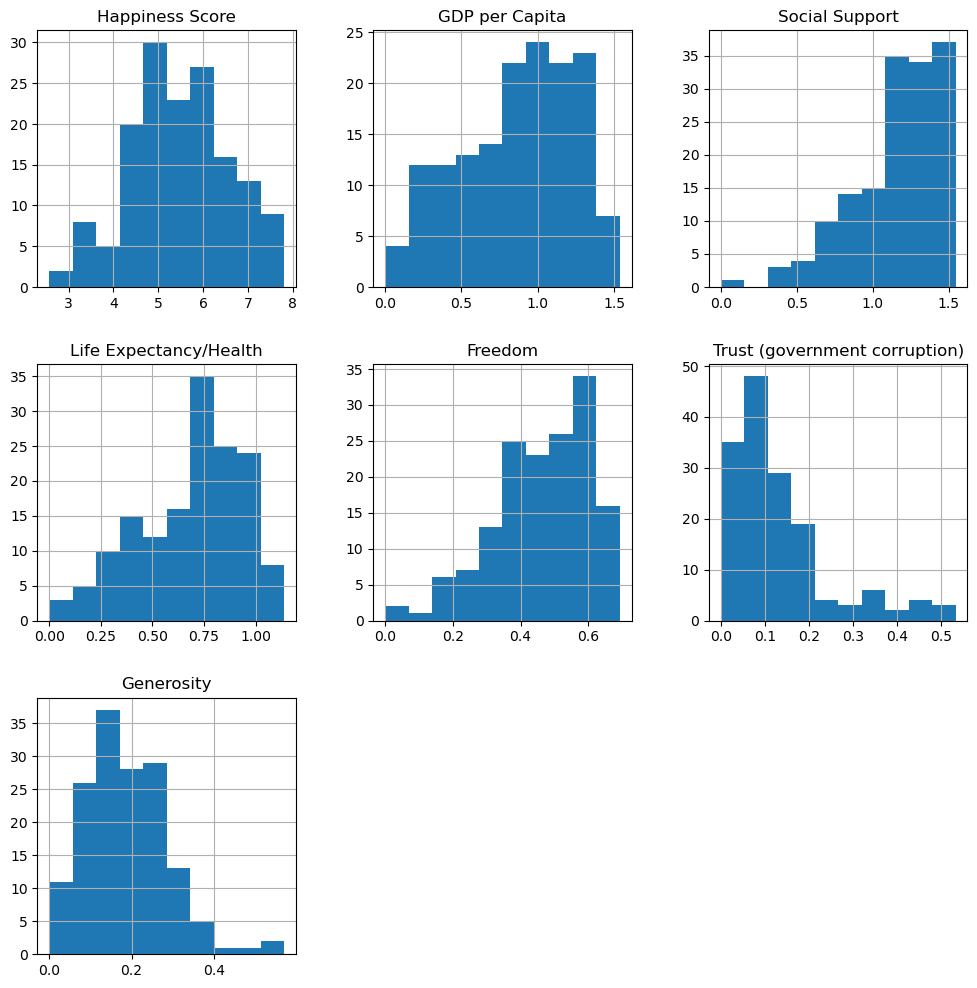

In [109]:
# distribution of all numeric data
plt.rcParams['figure.figsize'] = (12, 12)
data2020.hist();

## Seaborn Visualization:

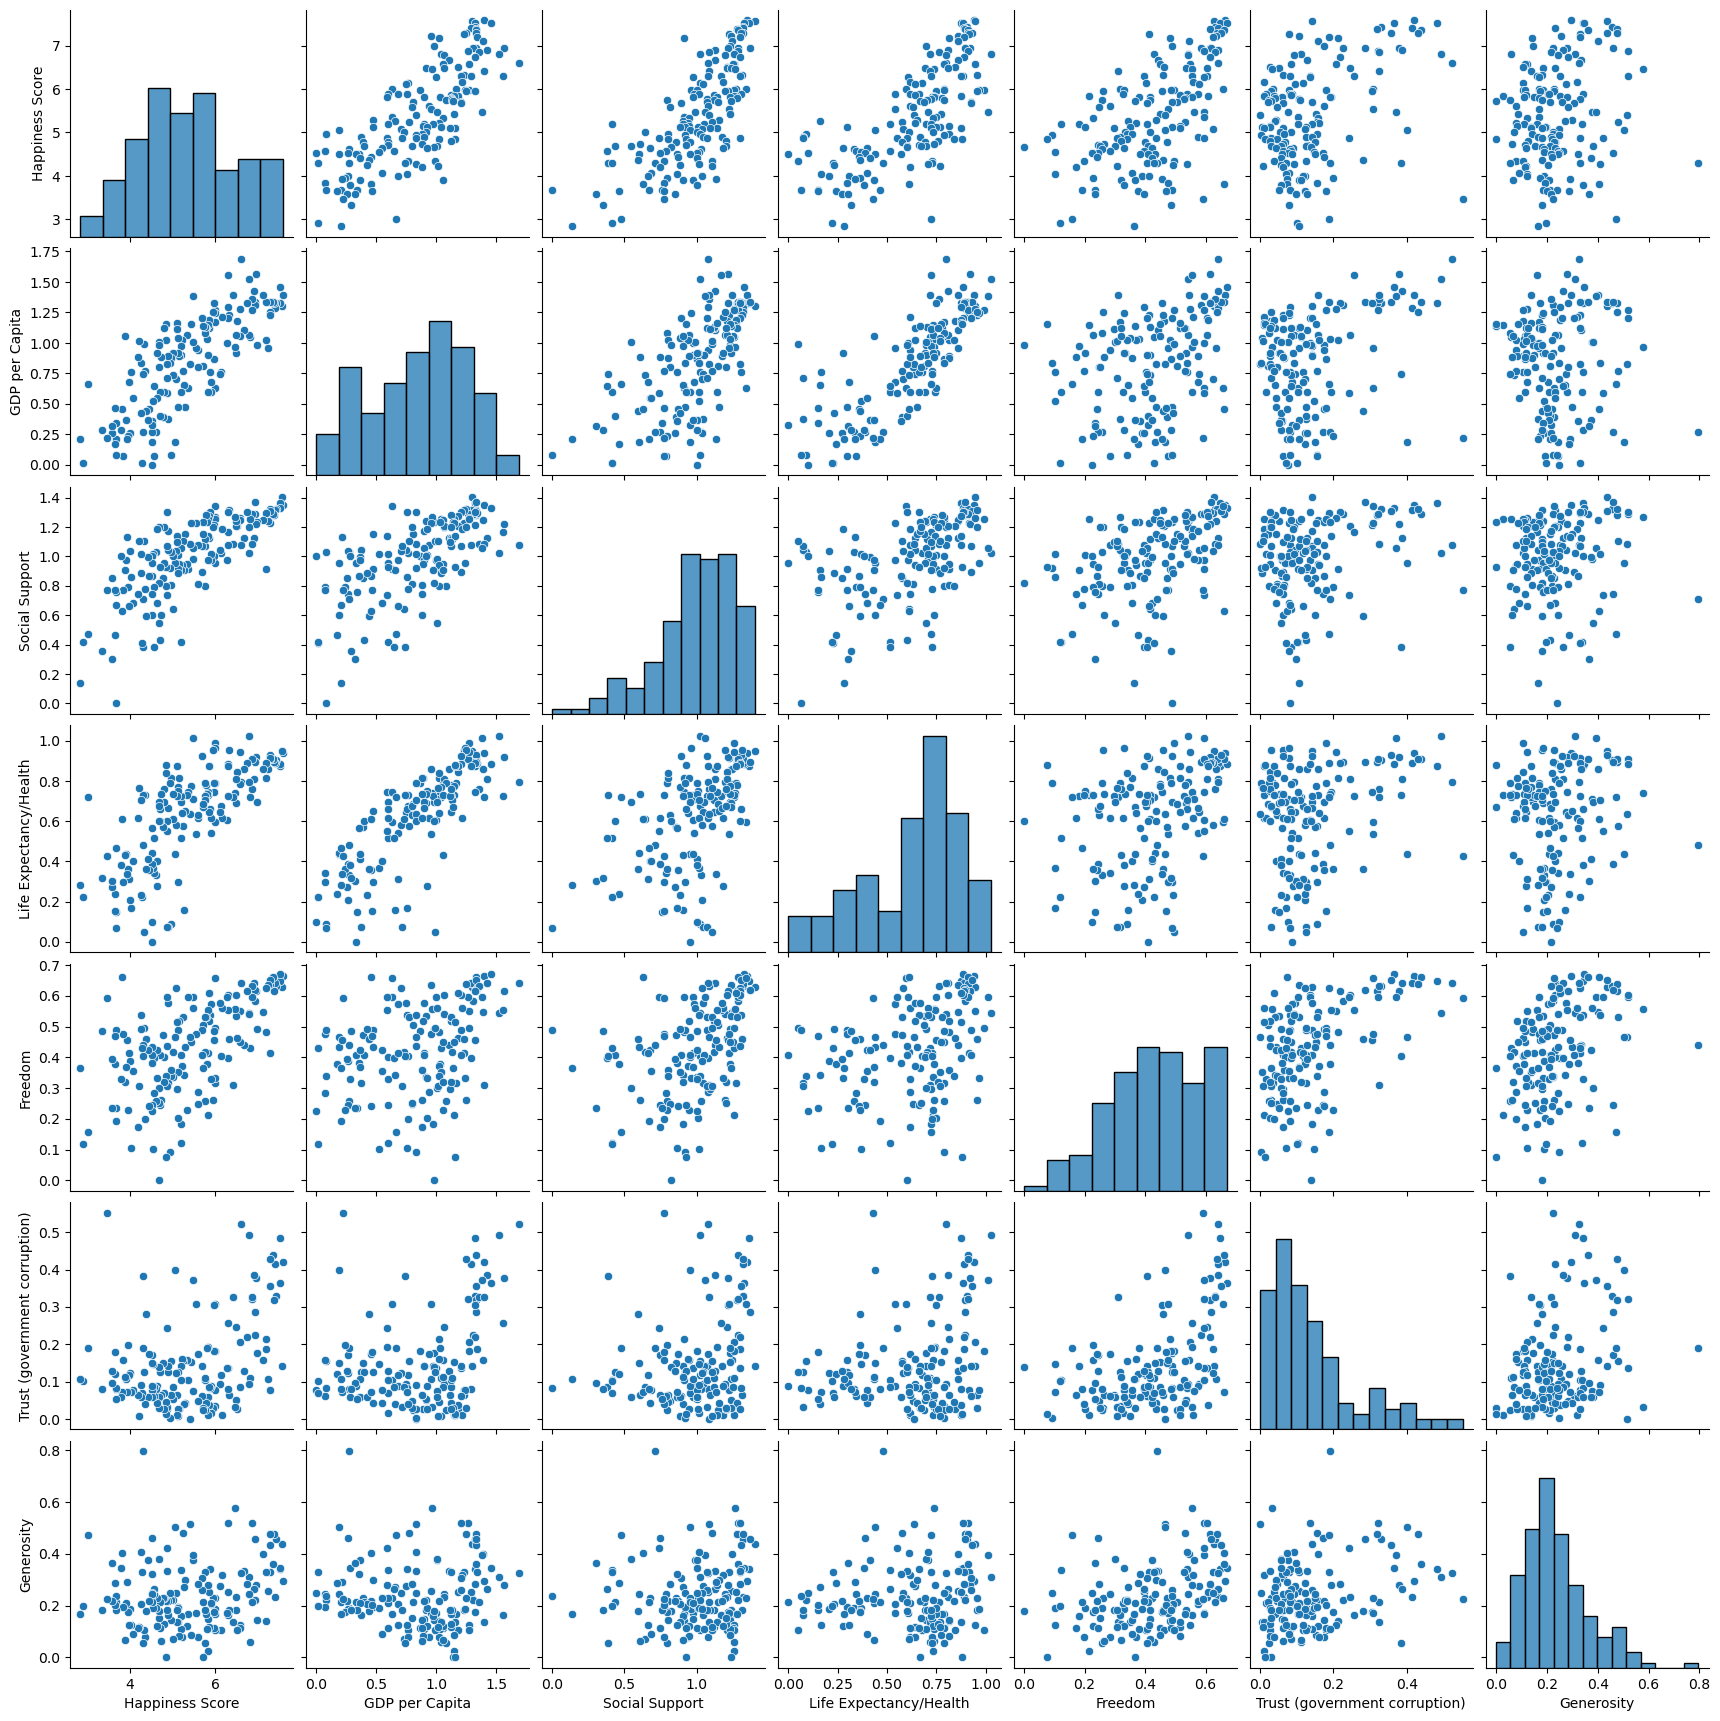

In [110]:
sns.pairplot(data2015)

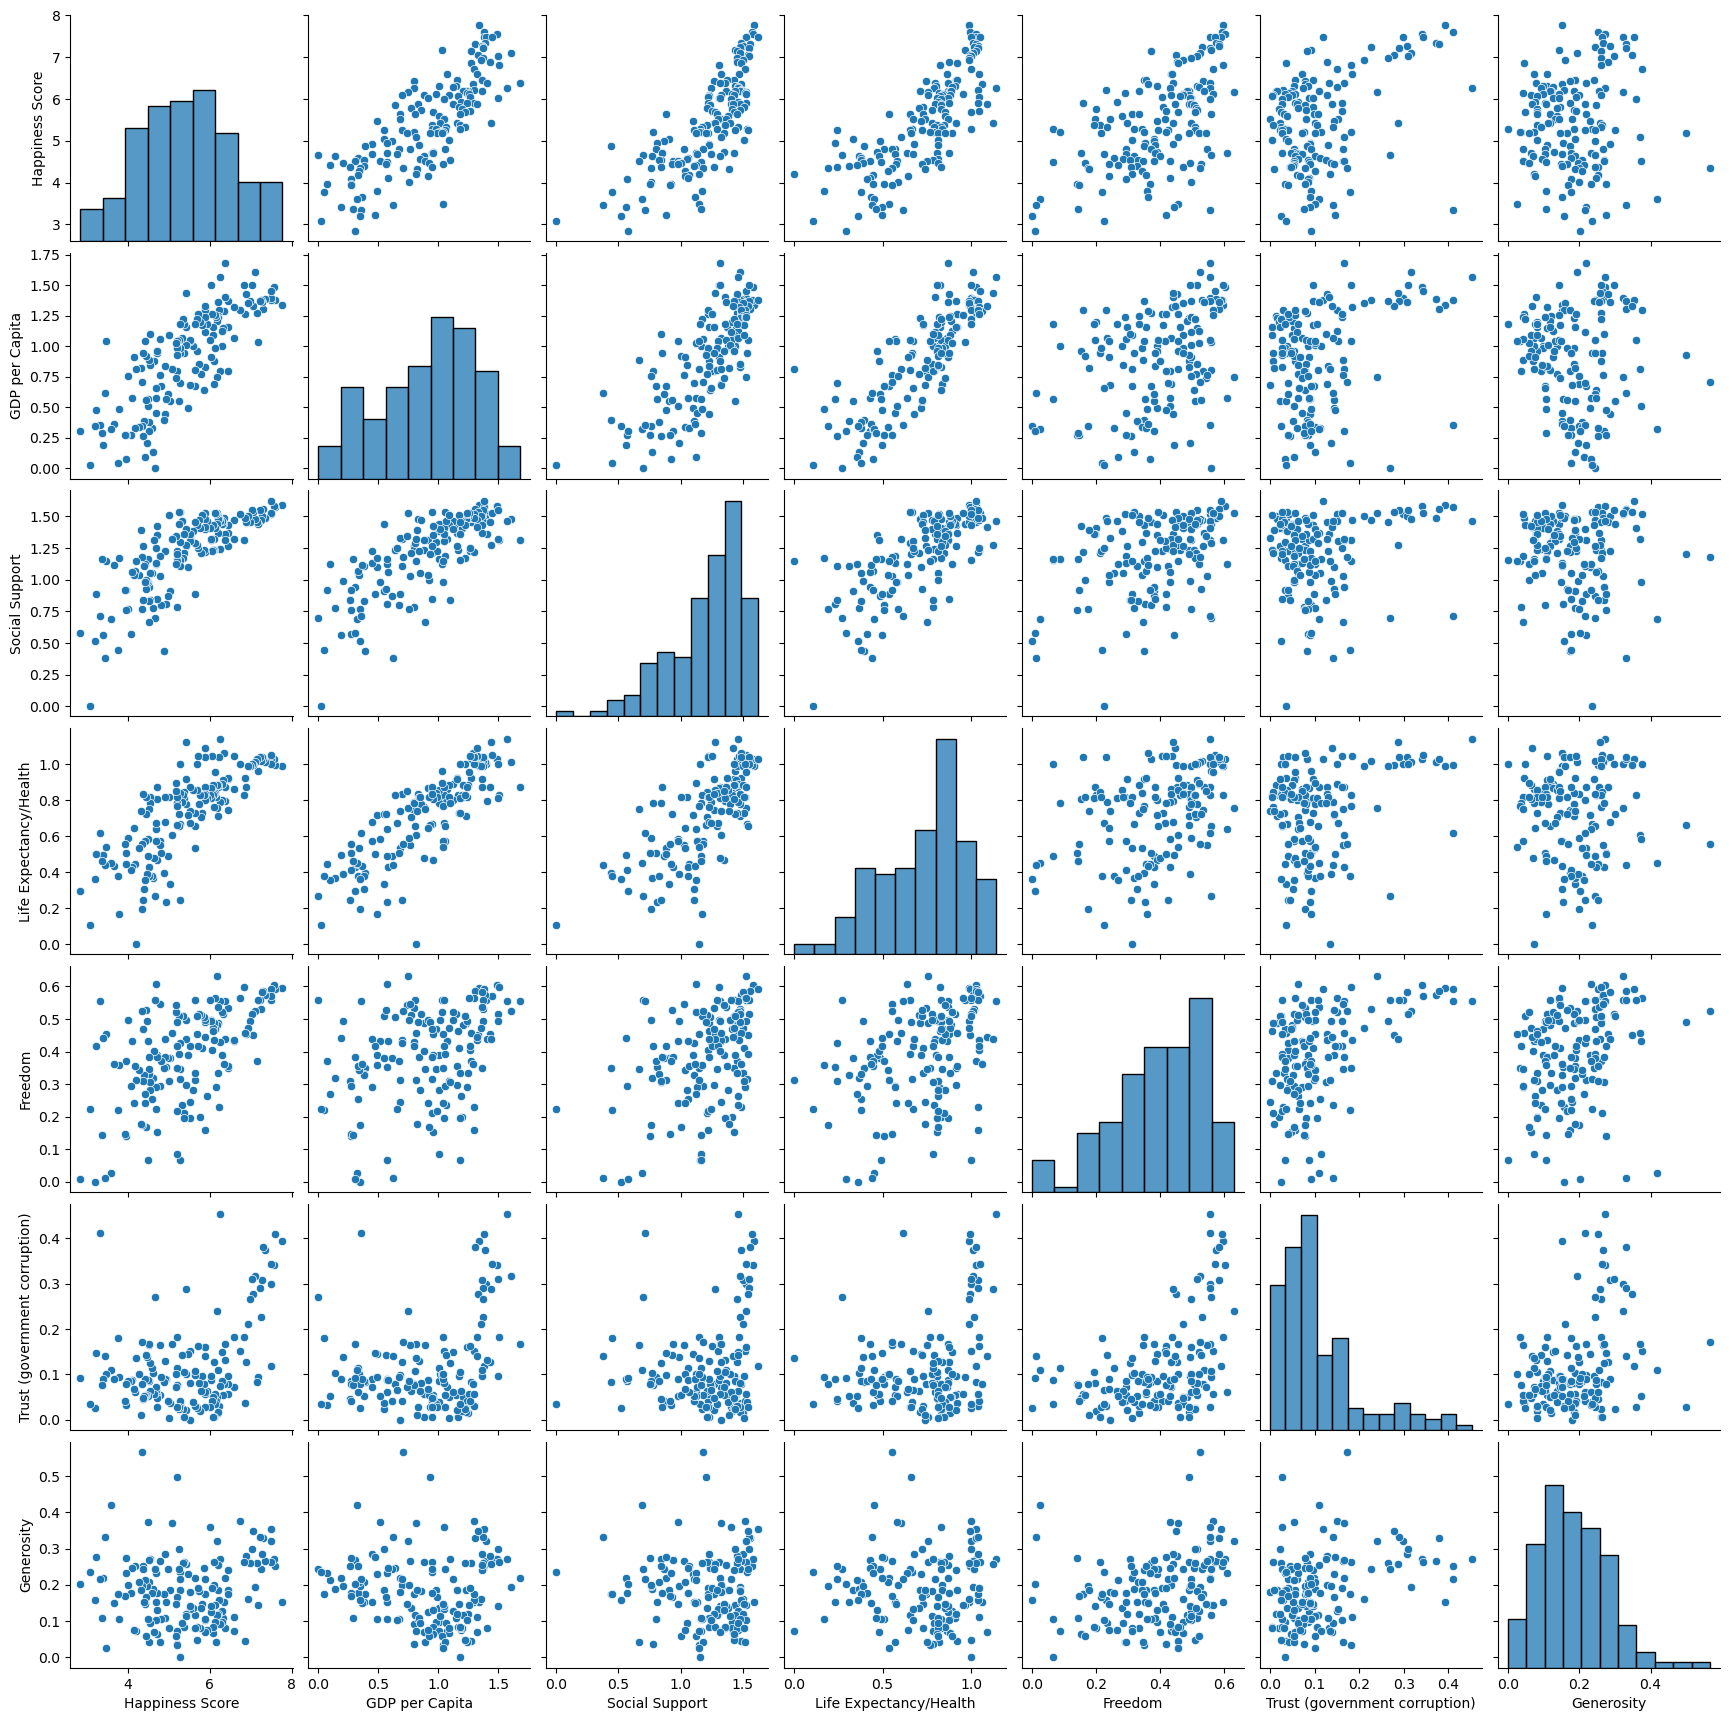

In [111]:
sns.pairplot(data2019)

## Regional Visualization with different attributes:

In [112]:
#Read our datas from csv files
data = pd.read_csv('resources/2015.csv') 
data.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [113]:
# remove columns that we will not use
data = data.drop(['Happiness Rank', 'Standard Error', 'Dystopia Residual'], axis=1)
data.head()

Country          Region  Happiness Score  Economy (GDP per Capita)  \
0  Switzerland  Western Europe            7.587                   1.39651   
1      Iceland  Western Europe            7.561                   1.30232   
2      Denmark  Western Europe            7.527                   1.32548   
3       Norway  Western Europe            7.522                   1.45900   
4       Canada   North America            7.427                   1.32629   

    Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0  1.34951                   0.94143  0.66557                        0.41978   
1  1.40223                   0.94784  0.62877                        0.14145   
2  1.36058                   0.87464  0.64938                        0.48357   
3  1.33095                   0.88521  0.66973                        0.36503   
4  1.32261                   0.90563  0.63297                        0.32957   

   Generosity  
0     0.29678  
1     0.43630  
2     0.34139  
3     0.34699  
4     0.45811

In [114]:
# all regions
data["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

<Axes: xlabel='Happiness Score', ylabel='Region'>

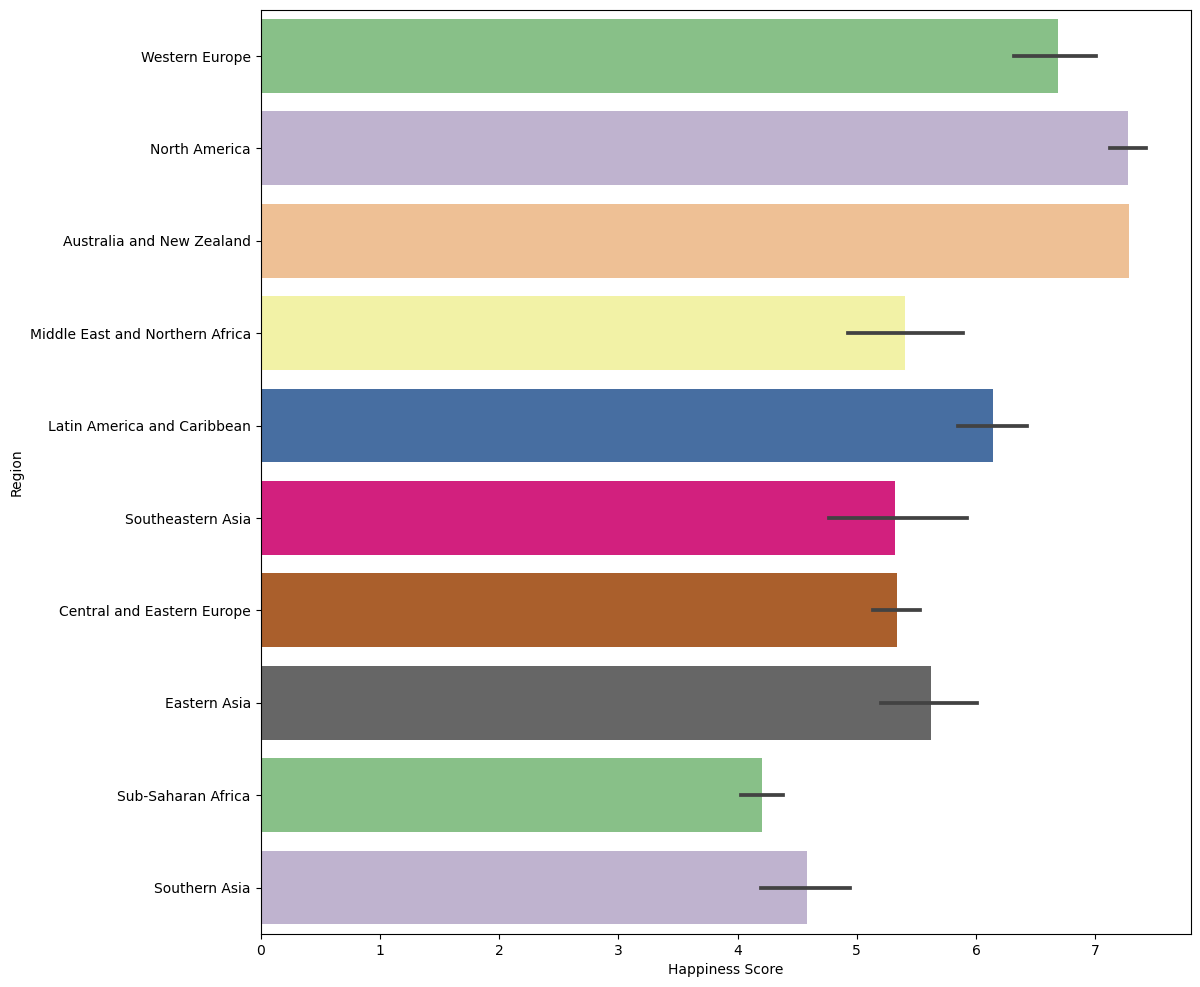

In [115]:
# Regions with Happiness Score
sns.barplot(x="Happiness Score", y="Region", data=data, palette='Accent')

<Axes: xlabel='Family', ylabel='Region'>

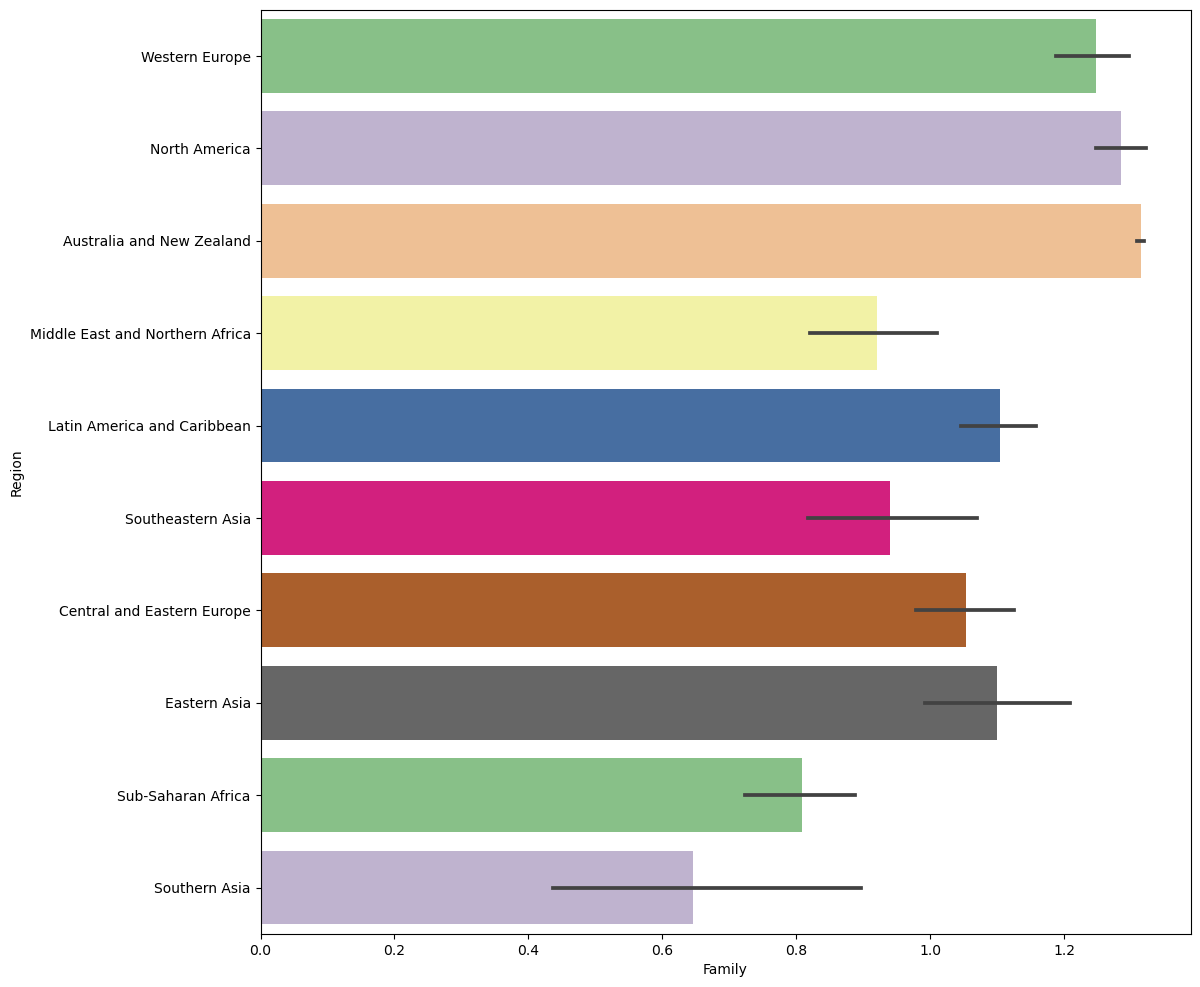

In [116]:
#Region with the Social Support
sns.barplot(x="Family", y="Region", data=data, palette='Accent')

<Axes: xlabel='Generosity', ylabel='Region'>

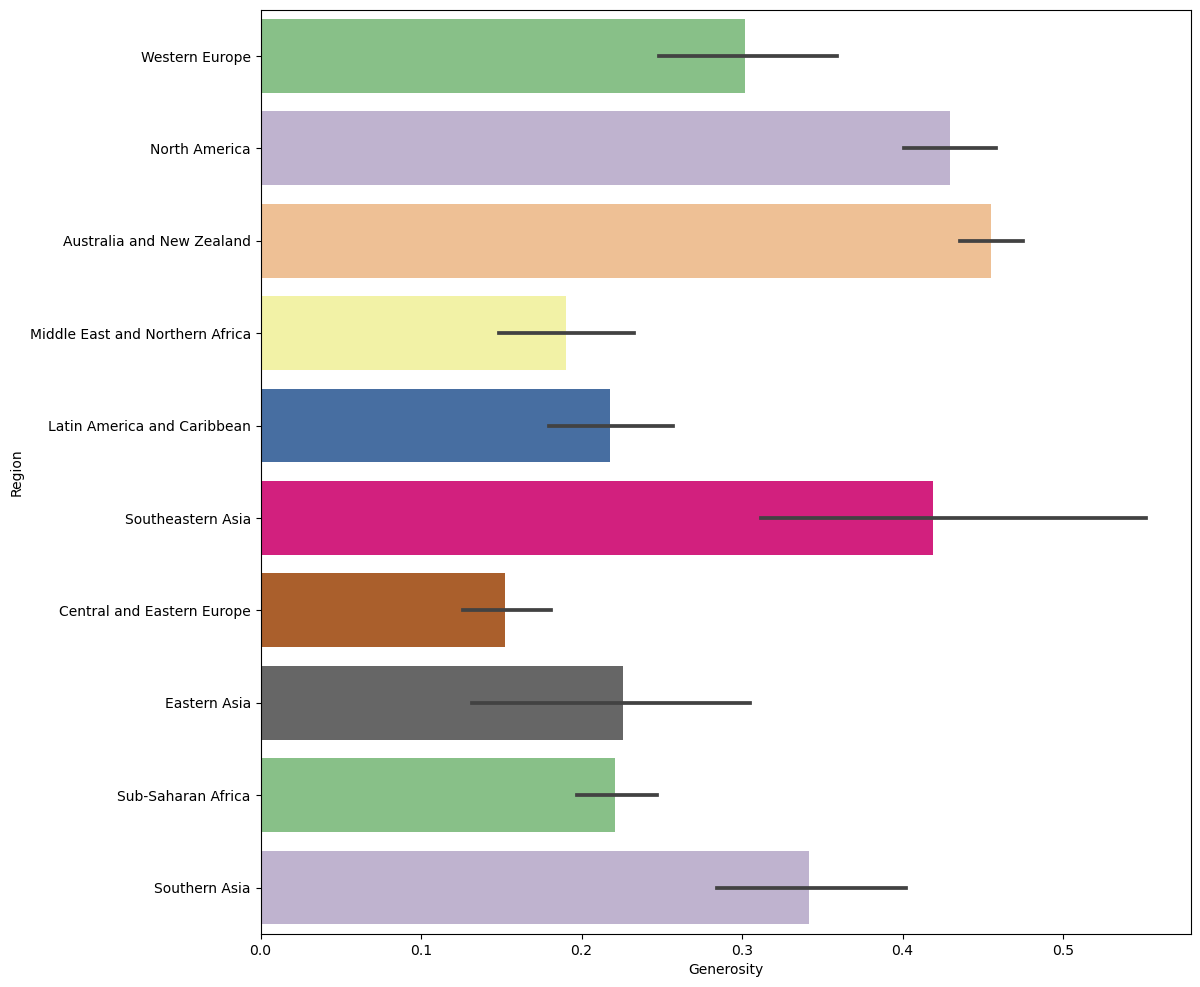

In [117]:
#  Regions with Generosity
sns.barplot(x="Generosity", y="Region", data=data, palette='Accent')

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Region'>

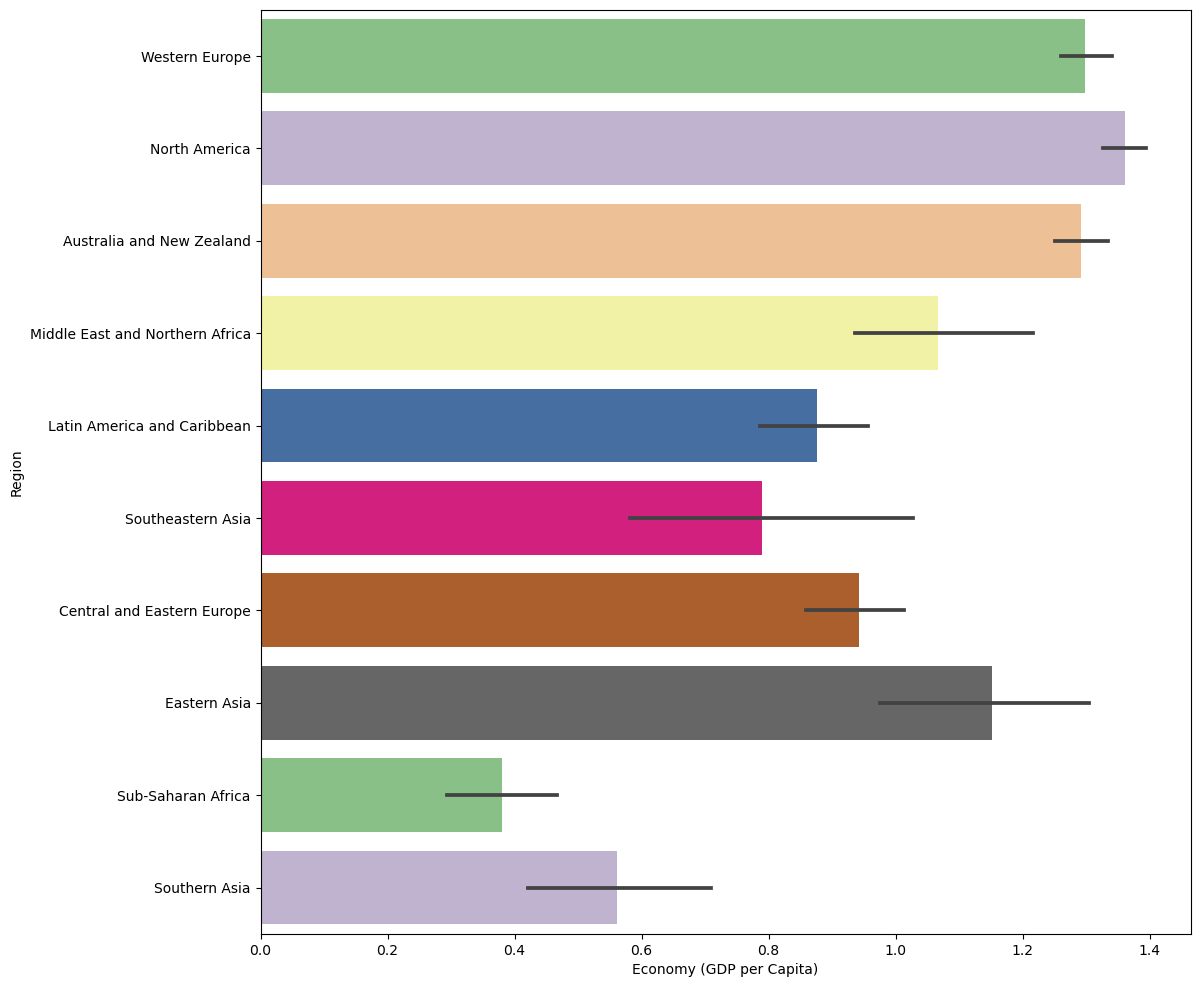

In [118]:
#  Regions with GDP per Capita
sns.barplot(x="Economy (GDP per Capita)", y="Region", data=data, palette='Accent')